In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df['Email No.'].is_unique

True

In [5]:
df = df.drop(columns=['Email No.'])

In [30]:
percent_spam = {k:round((v/len(df)),2) for (k,v) in df['Prediction'].value_counts().to_dict().items()}

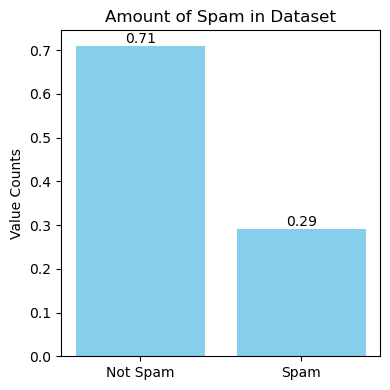

In [31]:
plot_dc(percent_spam, x_labels = ['Not Spam', 'Spam'])

In [25]:
def plot_dc(data, x_labels=None, y_label='Value Counts', title='Amount of Spam in Dataset'):

    categories = list(data.keys())
    values = list(data.values())
    
    if x_labels == None:
        x_labels=categories
        
    x = range(len(categories))
    
    plt.figure(figsize=(4, 4))
    bars = plt.bar(x, values, color='skyblue')

    #plt.xlabel('Categories')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(x, x_labels)  # Set x-tick labels to dictionary keys

    # Annotate bars with their height values
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                     ha='center', va='bottom', fontsize=10)

    add_labels(bars)

    plt.tight_layout()
    plt.show()

In [32]:
X= df.drop(columns='Prediction')
y= df['Prediction']

In [33]:
X['word_count'] = X.sum(axis=1)

In [35]:
def count_values_above_zero(row):
    return (row > 0).sum()

X['num_unique_words'] = X.apply(count_values_above_zero, axis=1)

In [36]:
spam_df = df[df['Prediction'] == 1]
spam_X = X.loc[spam_df.index]

ham_df = df[df['Prediction'] == 0]
ham_X = X.loc[ham_df.index]

In [38]:
def plot_mean(df1, df2, column_name, labels=['spam', 'ham']):
    mean_df1 = df1[column_name].mean()
    mean_df2 = df2[column_name].mean()
    
    means = pd.DataFrame({
        'DataFrame': labels,
        'Mean': [mean_df1, mean_df2]
    })
    
    ax = means.plot(kind='barh', x='DataFrame', y='Mean', figsize=(10, 6), color=['orange', 'skyblue'], legend=False)
    
    plt.title(f'Average {column_name}')
    plt.xlabel('Mean Value')
    plt.ylabel('DataFrame')
    
    for index, value in enumerate(means['Mean']):
        ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')
    
    lowest_mean = min([mean_df1, mean_df2])
    highest_mean = max([mean_df1, mean_df2])
    difference = highest_mean - lowest_mean
    
    plt.xlim(lowest_mean - difference/3, highest_mean + difference/3)
    plt.show()

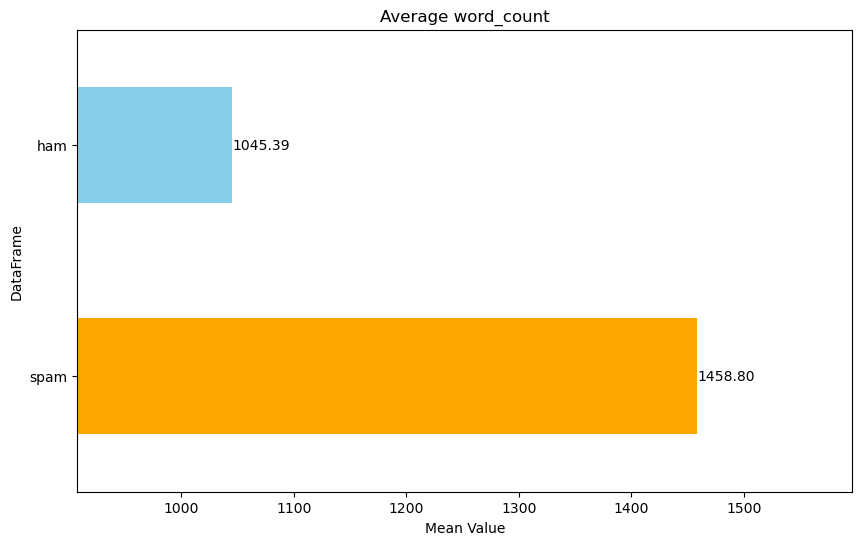

In [39]:
plot_mean(spam_X, ham_X, 'word_count')

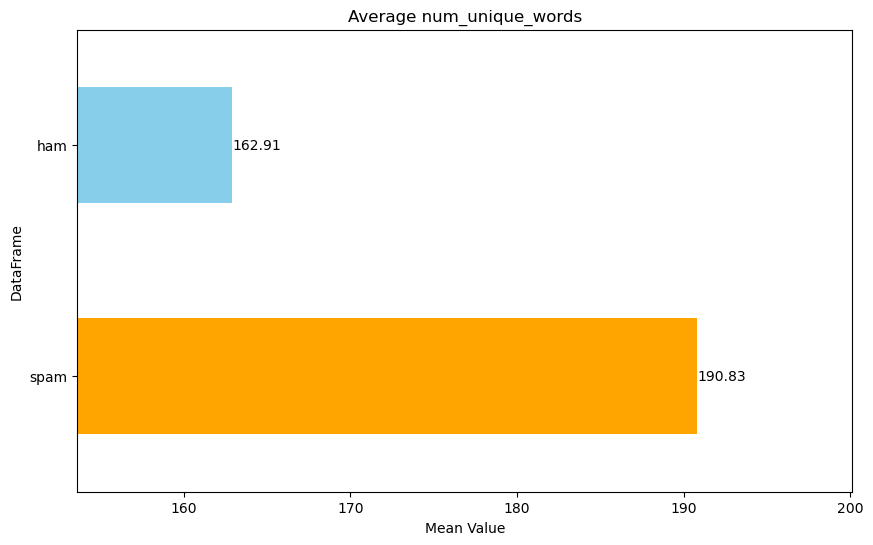

In [40]:
plot_mean(spam_X, ham_X, 'num_unique_words')

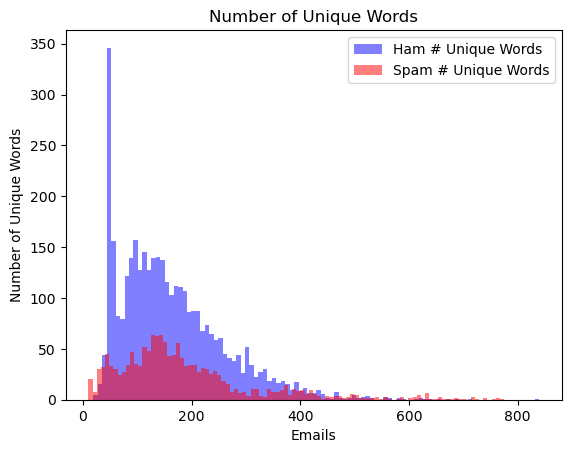

In [48]:
plt.hist(ham_X.num_unique_words,bins=100, alpha=0.5, label='Ham # Unique Words', color='blue')
plt.hist(spam_X.num_unique_words, bins=100,alpha=0.5, label='Spam # Unique Words', color='red')

plt.title('Number of Unique Words')
plt.xlabel('Emails')
plt.ylabel('Number of Unique Words')

plt.legend()

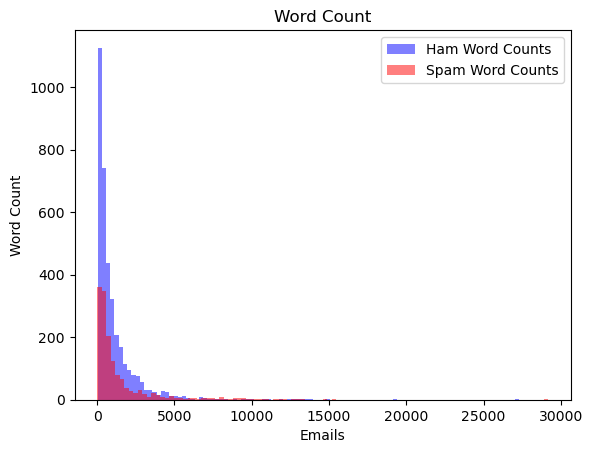

In [49]:
plt.hist(ham_X.word_count, bins=100, alpha=0.5, label='Ham Word Counts', color='blue')
plt.hist(spam_X.word_count, bins=100, alpha=0.5, label='Spam Word Counts', color='red')

plt.title('Word Count')
plt.xlabel('Emails')
plt.ylabel('Word Count')

plt.legend()

Spam and Ham emails both have similar distributions of # of unique words. There is just more Ham emails in the dataset than Spam emails.

In [44]:
print('Maximum Num of Unique Words in Spam Emails: ' + str(spam_X.num_unique_words.max()))
print('Minimum Num of Unique Words in Spam Emails: ' + str(spam_X.num_unique_words.min()))
print('Mean Num of Unique Words in Spam Emails: ' + str(spam_X.num_unique_words.mean()))
print('\n')
print('Maximum Num of Unique Words in Ham Emails: ' + str(ham_X.num_unique_words.max()))
print('Minimum Num of Unique Words in Ham Emails: ' + str(ham_X.num_unique_words.min()))
print('Mean Num of Unique Words in Spam Emails: ' + str(ham_X.num_unique_words.mean()))

Maximum Num of Unique Words in Spam Emails: 775
Minimum Num of Unique Words in Spam Emails: 10
Mean Num of Unique Words in Spam Emails: 190.834


Maximum Num of Unique Words in Ham Emails: 840
Minimum Num of Unique Words in Ham Emails: 19
Mean Num of Unique Words in Spam Emails: 162.90958605664488


In [50]:
print('Maximum Word Count in Spam Emails: ' + str(spam_X.word_count.max()))
print('Minimum Word Count in Spam Emails: ' + str(spam_X.word_count.min()))
print('Mean Word Count in Spam Emails: ' + str(spam_X.word_count.mean()))
print('\n')
print('Maximum Word Count in Ham Emails: ' + str(ham_X.word_count.max()))
print('Minimum Word Count in Ham Emails: ' + str(ham_X.word_count.min()))
print('Mean Word Count in Spam Emails: ' + str(ham_X.word_count.mean()))

Maximum Word Count in Spam Emails: 29178
Minimum Word Count in Spam Emails: 8
Mean Word Count in Spam Emails: 1458.7986666666666


Maximum Word Count in Ham Emails: 27319
Minimum Word Count in Ham Emails: 21
Mean Word Count in Spam Emails: 1045.3918845315904


In [250]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [325]:
top_classes = {
    'LGBM': LGBMClassifier(verbose=0),
    'CatBoost':CatBoostClassifier(silent=True),
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest100': RandomForestClassifier(),
    'RandomForest200': RandomForestClassifier(n_estimators=200),
    'SVMLinear': SVC(kernel='linear', probability=True),
    'SVMSigmoid': SVC(kernel='sigmoid', probability=True),
    'GradientBoost': GradientBoostingClassifier(),
    'ADABoost100': AdaBoostClassifier(n_estimators=100),
    'ADABoost200': AdaBoostClassifier(n_estimators=200),
}

In [579]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score, roc_curve

def sc_pca_class_test(X, y, scaler, reduce, components, ts, classifier, split_method, rs):

    if scaler:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = None
        
    r_params = {'n_components': components, 'random_state': rs}
    
    r_dc = {'pca': PCA(**r_params),
             'svd' : TruncatedSVD(**r_params),
             'tsne': TSNE(method='exact', n_components= components, random_state= rs),
             'lda_svd' : LDA(n_components= 2, solver= 'svd')}
    
    if reduce in r_dc.keys():
        if reduce[:3].lower() == 'lda':
            X_reduced = r_dc[reduce].fit_transform(X_scaled, y)
        else:
            X_reduced = r_dc[reduce].fit_transform(X_scaled)
    else: 
        X_reduced = X_scaled.copy()   
        
    n_splits=int((1/ts))
    
    split_dc = {
           'skf' : StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rs),
            'sss' : StratifiedShuffleSplit(n_splits=n_splits, test_size=ts, random_state=rs),    
            'kf': KFold(n_splits=n_splits, shuffle=True, random_state=rs)
    }
    
    if split_method == 'tt':

        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=ts, random_state=rs)
        
    elif split_method in split_dc.keys():
        
        for train_index, test_index in split_dc[split_method].split(X_reduced, y):
            X_train, X_test = X_reduced[train_index], X_reduced[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
    else:
        print(split_method + ' not allowed')
        return 'FAILURE'
    
    classifier.fit(X_train, y_train)    
    
    y_pred = classifier.predict(X_test)
    # Get predicted probabilities for ROC AUC
    y_pred_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, 'predict_proba') else None
    
    # Calculate all metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    }
    
    # Calculate precision-recall curve data
    if y_pred_proba is not None:
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        ap_score = average_precision_score(y_test, y_pred_proba)
        metrics.update({
            'precision_recall': (precision, recall, thresholds),
            'average_precision': ap_score
        })
        
        fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)   
        metrics.update({'roc_curve': (fpr, tpr, roc_thresholds),
        'roc_auc': roc_auc
        })
        
    return metrics

In [576]:
top5

{'LGBM': LGBMClassifier(verbose=0),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x1c5162b8150>,
 'RandomForest100': RandomForestClassifier(),
 'RandomForest200': RandomForestClassifier(n_estimators=200),
 'ADABoost200': AdaBoostClassifier(n_estimators=200)}

In [580]:
top5_metrics = {}

    
for c_name, classifier in top5.items():
    for split_method in ['tt','skf', 'sss']:
        scores = sc_pca_class_test(X, y, MinMaxScaler(), None, 50, 0.2, classifier, split_method, 11)
        key = c_name + '_' + split_method
        # Initialize the key in the dictionary if it does not exist
        if key not in top5_metrics:
            top5_metrics[key] = {}
        
        # Update the dictionary with scores
        top5_metrics[key].update(scores)
        
        

In [595]:
results_df = pd.DataFrame.from_dict(top5_metrics, orient='index').sort_values(by=['precision', 'average_precision'], ascending=False)
results_df
#results_df[results_df.index.isin(compare_these)].sort_values(by=['f1', 'roc_auc'], ascending=False)

,accuracy,precision,recall,f1,roc_auc,precision_recall,average_precision,roc_curve
RandomForest200_sss,0.984541,0.979730,0.966667,0.973154,0.997984,"([0.2898550724637681, 0.32967032967032966, 0.3...",0.993769,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
RandomForest200_tt,0.974879,0.975265,0.935593,0.955017,0.996670,"([0.28502415458937197, 0.3248898678414097, 0.3...",0.991867,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
CatBoost_tt,0.978744,0.972318,0.952542,0.962329,0.998044,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.995177,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.00135135135135135..."
CatBoost_sss,0.986473,0.970395,0.983333,0.976821,0.998381,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995794,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013605..."
LGBM_sss,0.987440,0.967427,0.990000,0.978583,0.998780,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.996791,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013605..."
RandomForest100_sss,0.976812,0.966216,0.953333,0.959732,0.997732,"([0.2898550724637681, 0.35046728971962615, 0.3...",0.993801,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
RandomForest100_tt,0.972947,0.965157,0.938983,0.951890,0.996919,"([0.28502415458937197, 0.33986175115207373, 0....",0.992661,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
CatBoost_skf,0.982592,0.963816,0.976667,0.970199,0.998193,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.995192,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
LGBM_tt,0.980676,0.962963,0.969492,0.966216,0.997783,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.994656,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013513..."
ADABoost200_sss,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.00136054421768707..."


In [615]:
compare_these = ['RandomForest200_sss', 'RandomForest200_tt', 'CatBoost_tt','CatBoost_sss']

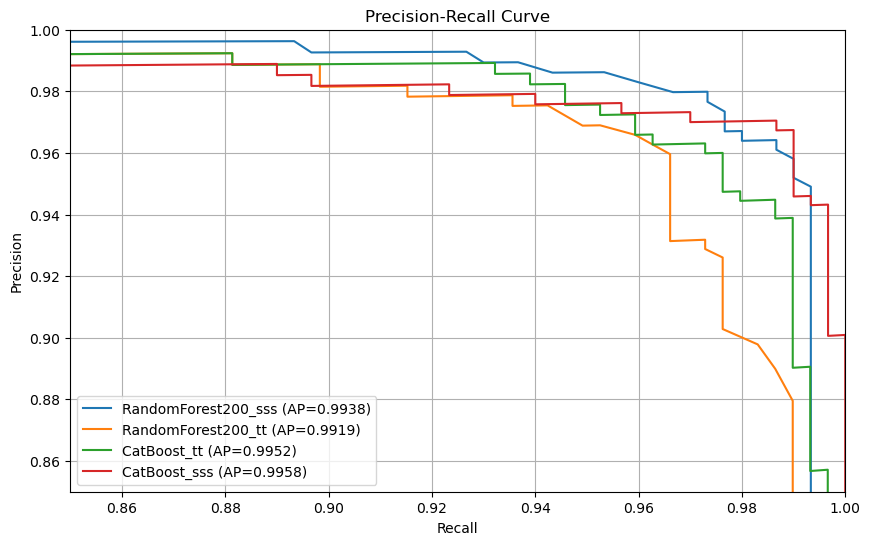

In [636]:
plt.figure(figsize=(10, 6)) 

for idx, row in results_df[results_df.index.isin(compare_these)].iterrows():
    pr = row['precision_recall']
    ap = row['average_precision']
    plot_pr_curve(pr, ap, min=0.85, max=1, label=idx)
    
plt.show()

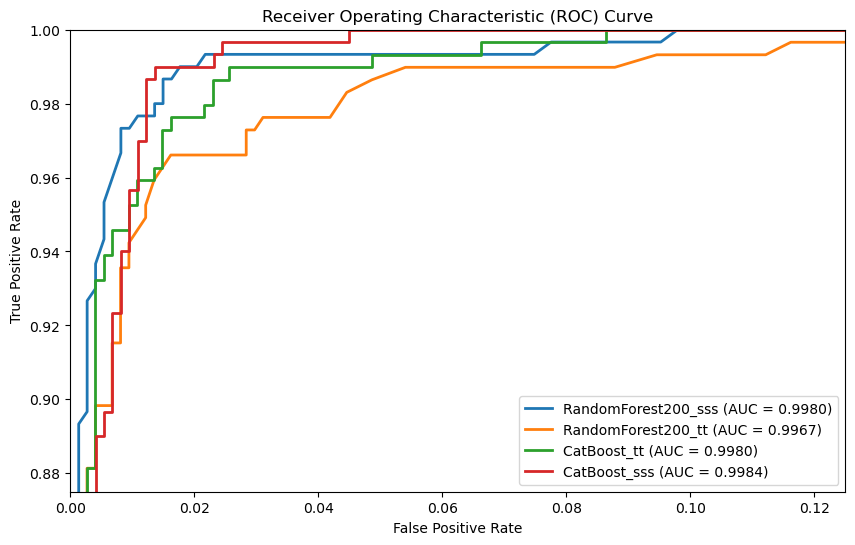

In [634]:
plt.figure(figsize=(10, 6))

for idx, row in results_df[results_df.index.isin(compare_these)].iterrows():
    fpr, tpr, roc_thresholds = row['roc_curve']
    roc_auc = row['roc_auc']
    label = idx 
    plot_roc_curve(fpr, tpr, roc_auc, label=label)

In [633]:
def plot_roc_curve(fpr, tpr, roc_auc, x_max = 0.125, y_min=0.875, label=None):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, x_max])
    plt.ylim([y_min, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')


In [635]:
def plot_pr_curve(precision_recall, average_precision, min=0.75, max=1.0, label=None):

    precision, recall, _ = precision_recall

    plt.plot(recall, precision, label=f'{label} (AP={average_precision:.4f})')
    plt.xlim([min, max])
    plt.ylim([min, max])    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)

In [333]:
metrics3 = {}

    
for c_name, classifier in top_classes.items():
    for split_method in ['tt','skf', 'sss']:
        scores = sc_pca_class_test(X, y, MinMaxScaler(), None, 50, 0.2, classifier, split_method, 11)
        key = c_name + '_' + split_method
        # Initialize the key in the dictionary if it does not exist
        if key not in metrics3:
            metrics3[key] = {}
        
        # Update the dictionary with scores
        metrics3[key].update(scores)
        
        

In [418]:
results_df = pd.DataFrame.from_dict(metrics3, orient='index').sort_values(by=['f1', 'roc_auc'], ascending=False)
results_df
#results_df[results_df.index.isin(compare_these)].sort_values(by=['f1', 'roc_auc'], ascending=False)

,accuracy,precision,recall,f1,roc_auc,precision_recall,average_precision
CatBoost_skf,0.982592,0.963816,0.976667,0.970199,0.998193,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.995192
ADABoost200_skf,0.980658,0.948718,0.986667,0.967320,0.995786,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.987478
LGBM_tt,0.980676,0.962963,0.969492,0.966216,0.997783,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.994656
LGBM_skf,0.979691,0.942857,0.990000,0.965854,0.998156,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.994959
RandomForest200_skf,0.978723,0.957237,0.970000,0.963576,0.996524,"([0.2901353965183752, 0.31982942430703626, 0.3...",0.990081
RandomForest100_tt,0.978744,0.969072,0.955932,0.962457,0.996949,"([0.28502415458937197, 0.3430232558139535, 0.3...",0.992036
CatBoost_tt,0.978744,0.972318,0.952542,0.962329,0.998044,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.995177
ADABoost200_tt,0.974879,0.946844,0.966102,0.956376,0.996115,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.990080
RandomForest200_tt,0.974879,0.975265,0.935593,0.955017,0.996010,"([0.28502415458937197, 0.3277777777777778, 0.3...",0.989507
SVMLinear_skf,0.970986,0.927215,0.976667,0.951299,0.991930,"([0.2901353965183752, 0.33482142857142855, 0.3...",0.976688


In [379]:
compare_these = ['SVMSigmoid_skf', 'CatBoost_skf', 'ADABoost200_skf', 'LGBM_skf', 'RandomForest200_skf', 'SVMSigmoid_tt']


In [570]:
results_df.sort_values(by=['average_precision', 'precision'], ascending=False)

,accuracy,precision,recall,f1,roc_auc,precision_recall,average_precision
CatBoost_skf,0.982592,0.963816,0.976667,0.970199,0.998193,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.995192
CatBoost_tt,0.978744,0.972318,0.952542,0.962329,0.998044,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.995177
LGBM_skf,0.979691,0.942857,0.990000,0.965854,0.998156,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.994959
LGBM_tt,0.980676,0.962963,0.969492,0.966216,0.997783,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.994656
RandomForest100_tt,0.978744,0.969072,0.955932,0.962457,0.996949,"([0.28502415458937197, 0.3430232558139535, 0.3...",0.992036
GradientBoost_tt,0.966184,0.964286,0.915254,0.939130,0.995852,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.990148
RandomForest200_skf,0.978723,0.957237,0.970000,0.963576,0.996524,"([0.2901353965183752, 0.31982942430703626, 0.3...",0.990081
ADABoost200_tt,0.974879,0.946844,0.966102,0.956376,0.996115,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.990080
RandomForest200_tt,0.974879,0.975265,0.935593,0.955017,0.996010,"([0.28502415458937197, 0.3277777777777778, 0.3...",0.989507
RandomForest100_skf,0.970986,0.953020,0.946667,0.949833,0.995865,"([0.2901353965183752, 0.3337041156840934, 0.35...",0.988208


In [613]:
def plot_pr_curve(precision_recall, average_precision, min=0.75, max=1.0, label=None):
    # Unpack the tuple
    precision, recall, _ = precision_recall
    
    # Create the plot
    plt.plot(recall, precision, label=f'{label} (AP={average_precision:.2f})')
    plt.xlim([min, max])
    plt.ylim([min, max])    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)

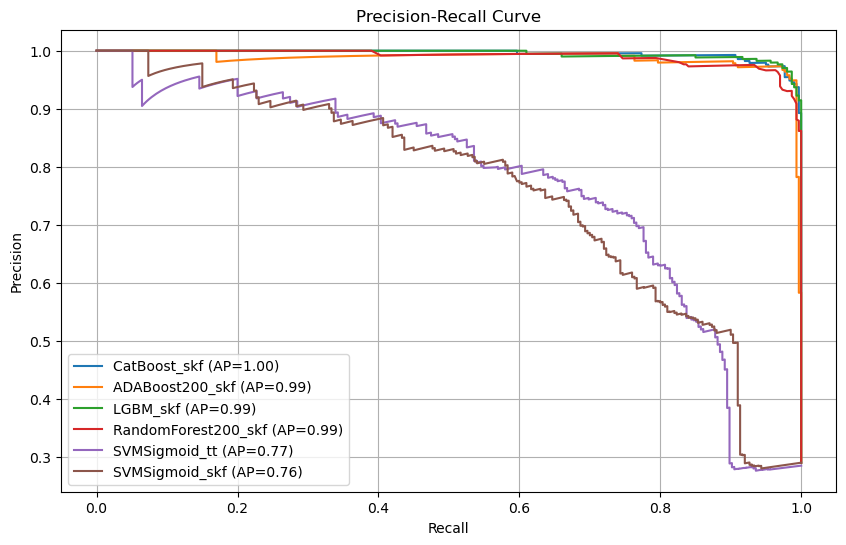

In [381]:
plt.figure(figsize=(10, 6)) 

for idx, row in results_df[results_df.index.isin(compare_these)].iterrows():
    #print(idx)
    pr = row['precision_recall']
    ap = row['average_precision']
    plot_pr_curve(pr, ap, label=idx)
    
plt.show()

In [ ]:
top_classes = {
    'LGBM': LGBMClassifier(verbose=0),
    'CatBoost':CatBoostClassifier(silent=True),
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest100': RandomForestClassifier(),
    'RandomForest200': RandomForestClassifier(n_estimators=200),
    'SVMLinear': SVC(kernel='linear', probability=True),
    'SVMSigmoid': SVC(kernel='sigmoid', probability=True),
    'GradientBoost': GradientBoostingClassifier(),
    'ADABoost100': AdaBoostClassifier(n_estimators=100),
    'ADABoost200': AdaBoostClassifier(n_estimators=200),
}

In [574]:
top5 = {k:v for (k,v) in top_classes.items() if k in ['CatBoost', 'ADABoost200', 'LGBM', 'RandomForest200','RandomForest100']}
top5

{'LGBM': LGBMClassifier(verbose=0),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x1c5162b8150>,
 'RandomForest100': RandomForestClassifier(),
 'RandomForest200': RandomForestClassifier(n_estimators=200),
 'ADABoost200': AdaBoostClassifier(n_estimators=200)}

In [536]:
from sklearn.preprocessing import RobustScaler

In [540]:
from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer, PowerTransformer

In [546]:
def big_process(class_dc, split_ls, scalar_ls, rsls):
    dc = {}

    for c_name, classifier in class_dc.items():
        for split_method in split_ls:
            for sc in scalar_ls:
                for rs in rsls:
                    scores = sc_pca_class_test(X, y, sc, None, 50, 0.2, classifier, split_method, rs)
                    key = c_name + '_' + split_method + '_' + sc.__class__.__name__ + '_' + str(rs)
                    # Initialize the key in the dictionary if it does not exist
                    if key not in metrics_top1:
                        dc[key] = {}

                    # Update the dictionary with scores
                    dc[key].update(scores)    
                    
    return pd.DataFrame.from_dict(dc, orient='index').sort_values(by=['f1', 'roc_auc'], ascending=False)

In [548]:
split_ls = ['tt','kf', 'skf', 'sss']
scalar_ls = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler(), 
                       QuantileTransformer(output_distribution='uniform'), PowerTransformer(method='yeo-johnson')]

In [556]:
metrics_top2 = {}
    
for c_name, classifier in top_three_classifiers.items():
    for split_method in ['tt', 'skf', 'sss', 'kf']:
        for sc in [RobustScaler(),QuantileTransformer(output_distribution='uniform'), PowerTransformer(method='yeo-johnson')]:
            scores = sc_pca_class_test(X, y, sc, None, 50, 0.2, classifier, split_method, 11)
            key = c_name + '_' + split_method + '_' + sc.__class__.__name__

            if key not in metrics_top2:
                metrics_top2[key] = {}

            # Update the dictionary with scores
            metrics_top2[key].update(scores)        

In [560]:
new_metrics_df = pd.DataFrame.from_dict(metrics_top2, orient='index').sort_values(by=['f1', 'roc_auc'], ascending=False)

In [562]:
dc1 = {}

for sc in ['RobustScaler','QuantileTransformer', 'PowerTransformer']:
    avg_f1 = new_metrics_df[new_metrics_df.index.isin([x for x in new_metrics_df.index if sc in x])]['f1'].mean()
    dc1[sc] = avg_f1
    
    
for sc in ['sss', 'tt', 'kf', 'skf']:
    avg_f1 = new_metrics_df[new_metrics_df.index.isin([x for x in new_metrics_df.index if sc in x])]['f1'].mean()
    dc1[sc] = avg_f1 
    
for sc in top_three_classifiers.keys():
    avg_f1 = new_metrics_df[new_metrics_df.index.isin([x for x in new_metrics_df.index if sc in x])]['f1'].mean()
    dc1[sc] = avg_f1    

In [563]:
pd.DataFrame.from_dict(dc1, orient='index', columns=['avg_f1']).sort_values(by='avg_f1', ascending=False)

,avg_f1
sss,0.973227
skf,0.970093
LGBM,0.969413
CatBoost,0.968910
PowerTransformer,0.966948
QuantileTransformer,0.966731
RobustScaler,0.966567
kf,0.966264
ADABoost200,0.961924
tt,0.961240


In [488]:
scalar_top_df = pd.DataFrame.from_dict(metrics_top1, orient='index').sort_values(by=['f1', 'roc_auc'], ascending=False)
scalar_top_df

,accuracy,precision,recall,f1,roc_auc,precision_recall,average_precision
LGBM_sss_StandardScaler,0.987440,0.967427,0.990000,0.978583,0.998993,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.997308
LGBM_sss_MinMaxScaler,0.987440,0.967427,0.990000,0.978583,0.998780,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.996791
CatBoost_sss_StandardScaler,0.986473,0.970395,0.983333,0.976821,0.998381,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995794
CatBoost_sss_MinMaxScaler,0.986473,0.970395,0.983333,0.976821,0.998381,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995794
CatBoost_sss_MaxAbsScaler,0.986473,0.970395,0.983333,0.976821,0.998381,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995794
LGBM_sss_MaxAbsScaler,0.985507,0.961165,0.990000,0.975369,0.998989,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.997330
LGBM_skf_StandardScaler,0.982592,0.951923,0.990000,0.970588,0.998015,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.994573
ADABoost200_sss_StandardScaler,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389
ADABoost200_sss_MinMaxScaler,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389
ADABoost200_sss_MaxAbsScaler,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389


In [530]:
scalar_top_df[scalar_top_df.index.isin([x for x in scalar_top_df.index if 'ADABoost200' in x])]

,accuracy,precision,recall,f1,roc_auc,precision_recall,average_precision
ADABoost200_sss_StandardScaler,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389
ADABoost200_sss_MinMaxScaler,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389
ADABoost200_sss_MaxAbsScaler,0.982609,0.960784,0.980000,0.970297,0.998204,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.995389
ADABoost200_skf_StandardScaler,0.980658,0.948718,0.986667,0.967320,0.995786,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.987478
ADABoost200_skf_MinMaxScaler,0.980658,0.948718,0.986667,0.967320,0.995786,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.987478
ADABoost200_skf_MaxAbsScaler,0.980658,0.948718,0.986667,0.967320,0.995786,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.987478
ADABoost200_tt_StandardScaler,0.974879,0.946844,0.966102,0.956376,0.996115,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.990080
ADABoost200_tt_MinMaxScaler,0.974879,0.946844,0.966102,0.956376,0.996115,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.990080
ADABoost200_tt_MaxAbsScaler,0.974879,0.946844,0.966102,0.956376,0.996115,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.990080
ADABoost200_kf_StandardScaler,0.972921,0.948718,0.961039,0.954839,0.994821,"([0.2978723404255319, 0.29816069699903197, 0.2...",0.989361


In [534]:
dc = {}

for sc in ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler']:
    avg_f1 = scalar_top_df[scalar_top_df.index.isin([x for x in scalar_top_df.index if sc in x])]['f1'].mean()
    dc[sc] = avg_f1
    
    
for sc in ['sss', 'tt', 'kf', 'skf']:
    avg_f1 = scalar_top_df[scalar_top_df.index.isin([x for x in scalar_top_df.index if sc in x])]['f1'].mean()
    dc[sc] = avg_f1 
    
for sc in top_three_classifiers.keys():
    avg_f1 = scalar_top_df[scalar_top_df.index.isin([x for x in scalar_top_df.index if sc in x])]['f1'].mean()
    dc[sc] = avg_f1    

In [535]:
pd.DataFrame.from_dict(dc, orient='index', columns=['avg_f1']).sort_values(by='avg_f1', ascending=False)

,avg_f1
sss,0.974877
CatBoost,0.969194
LGBM,0.968807
skf,0.968667
StandardScaler,0.967278
MinMaxScaler,0.966731
MaxAbsScaler,0.966200
kf,0.965027
ADABoost200,0.962208
tt,0.962016


In [490]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=5)


for train_index, test_index in sss.split(X, y):
    if isinstance(X, pd.DataFrame):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    else:
        X_train, X_test = X[train_index], X[test_index]

    if isinstance(y, pd.Series):
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    else:
        y_train, y_test = y[train_index], y[test_index]

In [500]:
sss_cat_res = evaluate_model(CatBoostClassifier(silent=True), X_train, X_test, y_train,y_test)

In [501]:
sss_cat_df = pd.DataFrame.from_dict(sss_cat_res, orient='index').T
sss_cat_df

,accuracy,precision,recall,f1,average_precision,precision_recall_curve,feature_importances
0,0.976812,0.966216,0.953333,0.959732,0.993079,"([0.2898550724637681, 0.2901353965183752, 0.29...","[2.321522656555514, 0.1357433733117541, 0.1914..."


In [502]:
feature_df = pd.DataFrame.from_dict(dict(zip(X_train.columns, sss_cat_df.loc[0,'feature_importances'])), orient='index').rename(columns={0:'importance'}).sort_values(by='importance', ascending=False)
feature_df

,importance
enron,21.133434
hpl,5.259159
daren,4.074039
attached,3.752097
http,2.668702
...,...
near,0.000000
common,0.000000
package,0.000000
title,0.000000


In [503]:
for x in feature_df[feature_df.importance > 0.1].index:
    print(x)

enron
hpl
daren
attached
http
the
deal
ali
nom
hanks
aren
our
gas
questions
will
thank
z
texas
meter
ii
subject
houston
volume
day
forwarded
thanks
as
money
soft
your
more
sec
th
mo
sex
ic
question
please
gra
best
da
num_unique_words
off
friday
drug
neon
word_count
nomination
sitara
hot
let
click
it
you
r
mobile
p
for
s
q
re
i
top
im
v
bob
mail
h
remove
g
dr
lease
hotmail
meds
pm
here
pt
million
prescription
online
have
home
forward
revised
c
xls
know
mb
wil
ur
ect
april
up
get
e
me
follow
hp
ml
ff
following
huge
free
internationa
men
pain
invest
to
rm
this
offer
changes
hou
mai
rest
prices
resume
bar
team
t
email
on
than
d
l
a
y
cheap
cia


In [480]:
X_wo = df.drop(columns='Prediction')

In [482]:
metrics_top_wo = {}

    
for c_name, classifier in top_three_classifiers.items():
    for split_method in ['tt','kf', 'skf', 'sss']:
        scores = sc_pca_class_test(X_wo, y, MaxAbsScaler(), None, 50, 0.2, classifier, split_method, 11)
        key = c_name + '_' + split_method
        # Initialize the key in the dictionary if it does not exist
        if key not in metrics_top_wo:
            metrics_top_wo[key] = {}
        
        # Update the dictionary with scores
        metrics_top_wo[key].update(scores)
        
        

In [489]:
top_three_wo_df = pd.DataFrame.from_dict(metrics_top_wo, orient='index').sort_values(by=['f1', 'roc_auc'], ascending=False)
top_three_wo_df

,accuracy,precision,recall,f1,roc_auc,precision_recall,average_precision
LGBM_sss,0.987440,0.967427,0.990000,0.978583,0.998812,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.996894
CatBoost_skf,0.985493,0.967213,0.983333,0.975207,0.998074,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.994911
CatBoost_sss,0.984541,0.964052,0.983333,0.973597,0.998190,"([0.2898550724637681, 0.2904162633107454, 0.29...",0.994967
LGBM_skf,0.983559,0.952077,0.993333,0.972268,0.997802,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.993776
ADABoost200_sss,0.981643,0.954693,0.983333,0.968801,0.997197,"([0.2898550724637681, 0.2901353965183752, 0.29...",0.992430
ADABoost200_skf,0.981625,0.957655,0.980000,0.968699,0.996235,"([0.2901353965183752, 0.2904162633107454, 0.29...",0.990312
LGBM_tt,0.981643,0.966216,0.969492,0.967851,0.997522,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.993821
CatBoost_kf,0.980658,0.976821,0.957792,0.967213,0.997437,"([0.2978723404255319, 0.29816069699903197, 0.2...",0.993818
LGBM_kf,0.979691,0.955556,0.977273,0.966292,0.997522,"([0.2978723404255319, 0.29816069699903197, 0.2...",0.994325
CatBoost_tt,0.978744,0.969072,0.955932,0.962457,0.998039,"([0.28502415458937197, 0.2852998065764023, 0.2...",0.995208


In [499]:
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    # Compute Precision-Recall Curve
    precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred_proba)
    
    feature_importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else 'N/A'
    
    if isinstance(model, lgb.LGBMClassifier):
        feature_importances = model.booster_.feature_importance(importance_type='weight')
    
    # Create a dictionary to store all metrics and importances
    results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'average_precision': average_precision,
        'precision_recall_curve': (precision_values, recall_values),
        'feature_importances': feature_importances
    }
    
    return results

In [293]:
dfls = []

for rs in scores1.keys():
    dfls.append(pd.DataFrame.from_dict(scores1[rs], orient='index', columns=['accuracy']).sort_values(by='accuracy', ascending=False))

In [294]:
s1_df = pd.concat(dfls, axis=1)

In [295]:
s1_df['Accuracy'] = s1_df[[col for col in s1_df.columns if col.startswith('a')]].mean(axis=1)

In [296]:
s1_df[['Accuracy']]

,Accuracy
CatBoost_skf,0.982592
LGBM_tt,0.980676
ADABoost200_skf,0.980658
LGBM_skf,0.979691
RandomForest200_skf,0.978401
CatBoost_tt,0.978744
ADABoost200_tt,0.974879
RandomForest100_tt,0.972947
RandomForest100_skf,0.977112
RandomForest200_tt,0.973913


In [297]:
def accuracy_graph(df):

    df.plot(x=df.index, y='y', kind='line', marker='o', title='Simple Line Graph')

    # Adding labels
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')

    # Show the plot
    plt.show()


In [298]:
s1_df = s1_df.iloc[:-1]

In [299]:
acc_std = np.std(s1_df.Accuracy)

(0.7925143798365262, 1.022766084380108)

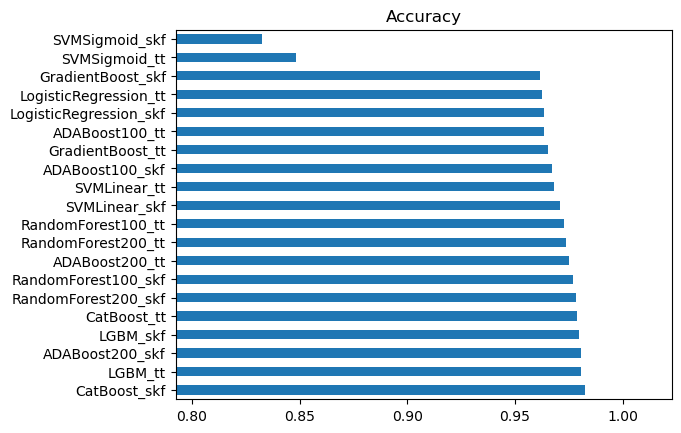

In [300]:
ax = s1_df[['Accuracy']].sort_values(by='Accuracy',ascending=False).plot(kind='barh', y='Accuracy', title='Accuracy', legend=False)

plt.xlim(min(s1_df.Accuracy) - acc_std, max(s1_df.Accuracy) + acc_std)

In [479]:
scores[4].keys()

dict_keys([None, 'LogisticRegression_tt', 'LogisticRegression_sss', 'LogisticRegression_skf', 'RandomForest100_tt', 'RandomForest100_sss', 'RandomForest100_skf', 'RandomForest200_tt', 'RandomForest200_sss', 'RandomForest200_skf', 'SVMLinear_tt', 'SVMLinear_sss', 'SVMLinear_skf', 'SVMSigmoid_tt', 'SVMSigmoid_sss', 'SVMSigmoid_skf', 'KNN5n_tt', 'KNN5n_sss', 'KNN5n_skf', 'KNN15n_tt', 'KNN15n_sss', 'KNN15n_skf', 'KNN25n_tt', 'KNN25n_sss', 'KNN25n_skf', 'LGBM_tt', 'LGBM_sss', 'LGBM_skf', 'GrdBst_tt', 'GrdBst_sss', 'GrdBst_skf', 'ADABoost100_tt', 'ADABoost100_sss', 'ADABoost100_skf', 'ADABoost200_tt', 'ADABoost200_sss', 'ADABoost200_skf', 'CatBoost_tt', 'CatBoost_sss', 'CatBoost_skf'])

In [302]:
scores = {
    4 : {None : None},
    10 : {None : None},
    104 : {None : None},
}

res_dfs1 = {
    4 : {None : None},
    10 : {None : None},
    104 : {None : None},
}
    
for c_name, classifier in top_classes.items():
    for split_method in ['tt', 'sss','skf']:
        for rs in scores.keys():
            a1, d1 = sc_pca_class_test(X, y, MinMaxScaler(), None, 50, 0.2, classifier, split_method, 11)
            key = c_name + '_' + split_method
            scores[rs].update({key:a1})
            res_dfs1[rs].update({key:d1})

[LightGBM] [Info] Number of positive: 1205, number of negative: 2932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21472
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291274 -> initscore=-0.889205
[LightGBM] [Info] Start training from score -0.889205
[LightGBM] [Info] Number of positive: 1205, number of negative: 2932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.194564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21472
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291274 -> initscore=-0.889205
[L

69:	learn: 0.2483495	total: 10.1s	remaining: 2m 14s
70:	learn: 0.2461634	total: 10.3s	remaining: 2m 14s
71:	learn: 0.2451466	total: 10.5s	remaining: 2m 14s
72:	learn: 0.2429463	total: 10.6s	remaining: 2m 14s
73:	learn: 0.2411908	total: 10.8s	remaining: 2m 15s
74:	learn: 0.2401328	total: 11s	remaining: 2m 15s
75:	learn: 0.2388599	total: 11.1s	remaining: 2m 14s
76:	learn: 0.2378022	total: 11.2s	remaining: 2m 14s
77:	learn: 0.2353256	total: 11.4s	remaining: 2m 14s
78:	learn: 0.2333690	total: 11.5s	remaining: 2m 14s
79:	learn: 0.2322141	total: 11.6s	remaining: 2m 13s
80:	learn: 0.2307649	total: 11.8s	remaining: 2m 14s
81:	learn: 0.2289083	total: 12s	remaining: 2m 14s
82:	learn: 0.2271202	total: 12.1s	remaining: 2m 14s
83:	learn: 0.2261207	total: 12.3s	remaining: 2m 14s
84:	learn: 0.2245261	total: 12.5s	remaining: 2m 14s
85:	learn: 0.2237438	total: 12.6s	remaining: 2m 14s
86:	learn: 0.2229578	total: 12.8s	remaining: 2m 14s
87:	learn: 0.2210037	total: 12.9s	remaining: 2m 13s
88:	learn: 0.220

226:	learn: 0.1289865	total: 32.8s	remaining: 1m 51s
227:	learn: 0.1287169	total: 33s	remaining: 1m 51s
228:	learn: 0.1283261	total: 33.1s	remaining: 1m 51s
229:	learn: 0.1277679	total: 33.2s	remaining: 1m 51s
230:	learn: 0.1274297	total: 33.4s	remaining: 1m 51s
231:	learn: 0.1271355	total: 33.5s	remaining: 1m 50s
232:	learn: 0.1269999	total: 33.6s	remaining: 1m 50s
233:	learn: 0.1266811	total: 33.8s	remaining: 1m 50s
234:	learn: 0.1262230	total: 33.9s	remaining: 1m 50s
235:	learn: 0.1258274	total: 34s	remaining: 1m 50s
236:	learn: 0.1256304	total: 34.2s	remaining: 1m 50s
237:	learn: 0.1252534	total: 34.3s	remaining: 1m 49s
238:	learn: 0.1249590	total: 34.4s	remaining: 1m 49s
239:	learn: 0.1246955	total: 34.6s	remaining: 1m 49s
240:	learn: 0.1244148	total: 34.7s	remaining: 1m 49s
241:	learn: 0.1241163	total: 34.9s	remaining: 1m 49s
242:	learn: 0.1235944	total: 35s	remaining: 1m 48s
243:	learn: 0.1234316	total: 35.1s	remaining: 1m 48s
244:	learn: 0.1229413	total: 35.2s	remaining: 1m 48s

383:	learn: 0.0926099	total: 53.3s	remaining: 1m 25s
384:	learn: 0.0924726	total: 53.4s	remaining: 1m 25s
385:	learn: 0.0923148	total: 53.5s	remaining: 1m 25s
386:	learn: 0.0921230	total: 53.6s	remaining: 1m 24s
387:	learn: 0.0919992	total: 53.8s	remaining: 1m 24s
388:	learn: 0.0917613	total: 53.9s	remaining: 1m 24s
389:	learn: 0.0916400	total: 54s	remaining: 1m 24s
390:	learn: 0.0914663	total: 54.2s	remaining: 1m 24s
391:	learn: 0.0913736	total: 54.3s	remaining: 1m 24s
392:	learn: 0.0911522	total: 54.4s	remaining: 1m 24s
393:	learn: 0.0910946	total: 54.6s	remaining: 1m 23s
394:	learn: 0.0909214	total: 54.8s	remaining: 1m 23s
395:	learn: 0.0907348	total: 54.9s	remaining: 1m 23s
396:	learn: 0.0905690	total: 55s	remaining: 1m 23s
397:	learn: 0.0904092	total: 55.2s	remaining: 1m 23s
398:	learn: 0.0902485	total: 55.3s	remaining: 1m 23s
399:	learn: 0.0900465	total: 55.5s	remaining: 1m 23s
400:	learn: 0.0898640	total: 55.7s	remaining: 1m 23s
401:	learn: 0.0897097	total: 55.7s	remaining: 1m 2

540:	learn: 0.0694746	total: 1m 14s	remaining: 1m 3s
541:	learn: 0.0693623	total: 1m 15s	remaining: 1m 3s
542:	learn: 0.0692612	total: 1m 15s	remaining: 1m 3s
543:	learn: 0.0691174	total: 1m 15s	remaining: 1m 3s
544:	learn: 0.0689790	total: 1m 15s	remaining: 1m 3s
545:	learn: 0.0688112	total: 1m 15s	remaining: 1m 2s
546:	learn: 0.0687131	total: 1m 15s	remaining: 1m 2s
547:	learn: 0.0686461	total: 1m 15s	remaining: 1m 2s
548:	learn: 0.0684678	total: 1m 16s	remaining: 1m 2s
549:	learn: 0.0683315	total: 1m 16s	remaining: 1m 2s
550:	learn: 0.0681978	total: 1m 16s	remaining: 1m 2s
551:	learn: 0.0680793	total: 1m 16s	remaining: 1m 2s
552:	learn: 0.0679590	total: 1m 16s	remaining: 1m 2s
553:	learn: 0.0677244	total: 1m 16s	remaining: 1m 1s
554:	learn: 0.0676360	total: 1m 17s	remaining: 1m 1s
555:	learn: 0.0675021	total: 1m 17s	remaining: 1m 1s
556:	learn: 0.0673381	total: 1m 17s	remaining: 1m 1s
557:	learn: 0.0672531	total: 1m 17s	remaining: 1m 1s
558:	learn: 0.0670643	total: 1m 17s	remaining:

696:	learn: 0.0541331	total: 1m 37s	remaining: 42.5s
697:	learn: 0.0540088	total: 1m 37s	remaining: 42.4s
698:	learn: 0.0538842	total: 1m 38s	remaining: 42.2s
699:	learn: 0.0537684	total: 1m 38s	remaining: 42.1s
700:	learn: 0.0536957	total: 1m 38s	remaining: 41.9s
701:	learn: 0.0535991	total: 1m 38s	remaining: 41.8s
702:	learn: 0.0535585	total: 1m 38s	remaining: 41.7s
703:	learn: 0.0534766	total: 1m 38s	remaining: 41.5s
704:	learn: 0.0533462	total: 1m 38s	remaining: 41.4s
705:	learn: 0.0532605	total: 1m 39s	remaining: 41.2s
706:	learn: 0.0532363	total: 1m 39s	remaining: 41.1s
707:	learn: 0.0531547	total: 1m 39s	remaining: 41s
708:	learn: 0.0530261	total: 1m 39s	remaining: 40.8s
709:	learn: 0.0529354	total: 1m 39s	remaining: 40.7s
710:	learn: 0.0528188	total: 1m 39s	remaining: 40.6s
711:	learn: 0.0527695	total: 1m 39s	remaining: 40.4s
712:	learn: 0.0526489	total: 1m 40s	remaining: 40.3s
713:	learn: 0.0525399	total: 1m 40s	remaining: 40.2s
714:	learn: 0.0524235	total: 1m 40s	remaining: 4

853:	learn: 0.0432415	total: 1m 59s	remaining: 20.4s
854:	learn: 0.0432293	total: 1m 59s	remaining: 20.2s
855:	learn: 0.0431340	total: 1m 59s	remaining: 20.1s
856:	learn: 0.0431272	total: 1m 59s	remaining: 19.9s
857:	learn: 0.0430149	total: 1m 59s	remaining: 19.8s
858:	learn: 0.0429423	total: 1m 59s	remaining: 19.7s
859:	learn: 0.0429267	total: 1m 59s	remaining: 19.5s
860:	learn: 0.0429227	total: 2m	remaining: 19.4s
861:	learn: 0.0428078	total: 2m	remaining: 19.2s
862:	learn: 0.0427388	total: 2m	remaining: 19.1s
863:	learn: 0.0427349	total: 2m	remaining: 19s
864:	learn: 0.0426535	total: 2m	remaining: 18.8s
865:	learn: 0.0425791	total: 2m	remaining: 18.7s
866:	learn: 0.0424957	total: 2m	remaining: 18.5s
867:	learn: 0.0424373	total: 2m 1s	remaining: 18.4s
868:	learn: 0.0424049	total: 2m 1s	remaining: 18.3s
869:	learn: 0.0422937	total: 2m 1s	remaining: 18.1s
870:	learn: 0.0422178	total: 2m 1s	remaining: 18s
871:	learn: 0.0421352	total: 2m 1s	remaining: 17.8s
872:	learn: 0.0421039	total: 2

11:	learn: 0.4774266	total: 1.74s	remaining: 2m 23s
12:	learn: 0.4713050	total: 1.89s	remaining: 2m 23s
13:	learn: 0.4621394	total: 1.98s	remaining: 2m 19s
14:	learn: 0.4555101	total: 2.13s	remaining: 2m 19s
15:	learn: 0.4458440	total: 2.29s	remaining: 2m 21s
16:	learn: 0.4400203	total: 2.45s	remaining: 2m 21s
17:	learn: 0.4307941	total: 2.55s	remaining: 2m 19s
18:	learn: 0.4241156	total: 2.7s	remaining: 2m 19s
19:	learn: 0.4177284	total: 2.87s	remaining: 2m 20s
20:	learn: 0.4129496	total: 2.96s	remaining: 2m 17s
21:	learn: 0.4052739	total: 3.12s	remaining: 2m 18s
22:	learn: 0.3986201	total: 3.26s	remaining: 2m 18s
23:	learn: 0.3931083	total: 3.37s	remaining: 2m 16s
24:	learn: 0.3865618	total: 3.51s	remaining: 2m 16s
25:	learn: 0.3800197	total: 3.67s	remaining: 2m 17s
26:	learn: 0.3726273	total: 3.76s	remaining: 2m 15s
27:	learn: 0.3690309	total: 3.92s	remaining: 2m 16s
28:	learn: 0.3623510	total: 4s	remaining: 2m 14s
29:	learn: 0.3564854	total: 4.16s	remaining: 2m 14s
30:	learn: 0.350

170:	learn: 0.1527623	total: 24s	remaining: 1m 56s
171:	learn: 0.1523898	total: 24.2s	remaining: 1m 56s
172:	learn: 0.1520345	total: 24.2s	remaining: 1m 55s
173:	learn: 0.1509867	total: 24.5s	remaining: 1m 56s
174:	learn: 0.1504397	total: 24.7s	remaining: 1m 56s
175:	learn: 0.1500679	total: 24.8s	remaining: 1m 56s
176:	learn: 0.1494144	total: 24.9s	remaining: 1m 55s
177:	learn: 0.1490001	total: 25.1s	remaining: 1m 55s
178:	learn: 0.1485084	total: 25.2s	remaining: 1m 55s
179:	learn: 0.1477206	total: 25.4s	remaining: 1m 55s
180:	learn: 0.1473057	total: 25.6s	remaining: 1m 55s
181:	learn: 0.1468598	total: 25.7s	remaining: 1m 55s
182:	learn: 0.1463132	total: 25.9s	remaining: 1m 55s
183:	learn: 0.1460072	total: 26.1s	remaining: 1m 55s
184:	learn: 0.1455737	total: 26.2s	remaining: 1m 55s
185:	learn: 0.1449457	total: 26.4s	remaining: 1m 55s
186:	learn: 0.1446462	total: 26.5s	remaining: 1m 55s
187:	learn: 0.1441673	total: 26.6s	remaining: 1m 54s
188:	learn: 0.1438481	total: 26.7s	remaining: 1m

325:	learn: 0.1030915	total: 45.5s	remaining: 1m 34s
326:	learn: 0.1028463	total: 45.7s	remaining: 1m 34s
327:	learn: 0.1027610	total: 45.8s	remaining: 1m 33s
328:	learn: 0.1026286	total: 46s	remaining: 1m 33s
329:	learn: 0.1024434	total: 46.1s	remaining: 1m 33s
330:	learn: 0.1022162	total: 46.3s	remaining: 1m 33s
331:	learn: 0.1020794	total: 46.4s	remaining: 1m 33s
332:	learn: 0.1018467	total: 46.5s	remaining: 1m 33s
333:	learn: 0.1016700	total: 46.7s	remaining: 1m 33s
334:	learn: 0.1014999	total: 46.8s	remaining: 1m 32s
335:	learn: 0.1014042	total: 46.9s	remaining: 1m 32s
336:	learn: 0.1010529	total: 47.1s	remaining: 1m 32s
337:	learn: 0.1008549	total: 47.2s	remaining: 1m 32s
338:	learn: 0.1007180	total: 47.4s	remaining: 1m 32s
339:	learn: 0.1005196	total: 47.5s	remaining: 1m 32s
340:	learn: 0.1004121	total: 47.6s	remaining: 1m 32s
341:	learn: 0.1001233	total: 47.8s	remaining: 1m 31s
342:	learn: 0.1000005	total: 47.9s	remaining: 1m 31s
343:	learn: 0.0999082	total: 48s	remaining: 1m 3

481:	learn: 0.0767958	total: 1m 7s	remaining: 1m 12s
482:	learn: 0.0766494	total: 1m 7s	remaining: 1m 12s
483:	learn: 0.0764698	total: 1m 7s	remaining: 1m 12s
484:	learn: 0.0764416	total: 1m 7s	remaining: 1m 12s
485:	learn: 0.0763823	total: 1m 7s	remaining: 1m 11s
486:	learn: 0.0763334	total: 1m 8s	remaining: 1m 11s
487:	learn: 0.0763140	total: 1m 8s	remaining: 1m 11s
488:	learn: 0.0760679	total: 1m 8s	remaining: 1m 11s
489:	learn: 0.0759678	total: 1m 8s	remaining: 1m 11s
490:	learn: 0.0758521	total: 1m 8s	remaining: 1m 11s
491:	learn: 0.0757084	total: 1m 8s	remaining: 1m 11s
492:	learn: 0.0755570	total: 1m 8s	remaining: 1m 10s
493:	learn: 0.0754865	total: 1m 9s	remaining: 1m 10s
494:	learn: 0.0753357	total: 1m 9s	remaining: 1m 10s
495:	learn: 0.0751870	total: 1m 9s	remaining: 1m 10s
496:	learn: 0.0750650	total: 1m 9s	remaining: 1m 10s
497:	learn: 0.0749258	total: 1m 9s	remaining: 1m 10s
498:	learn: 0.0747995	total: 1m 9s	remaining: 1m 10s
499:	learn: 0.0746644	total: 1m 9s	remaining: 

638:	learn: 0.0588713	total: 1m 29s	remaining: 50.3s
639:	learn: 0.0588026	total: 1m 29s	remaining: 50.2s
640:	learn: 0.0587747	total: 1m 29s	remaining: 50.1s
641:	learn: 0.0586873	total: 1m 29s	remaining: 50s
642:	learn: 0.0586713	total: 1m 29s	remaining: 49.8s
643:	learn: 0.0586495	total: 1m 29s	remaining: 49.7s
644:	learn: 0.0585679	total: 1m 30s	remaining: 49.5s
645:	learn: 0.0584969	total: 1m 30s	remaining: 49.4s
646:	learn: 0.0583381	total: 1m 30s	remaining: 49.3s
647:	learn: 0.0582212	total: 1m 30s	remaining: 49.1s
648:	learn: 0.0581349	total: 1m 30s	remaining: 49s
649:	learn: 0.0580297	total: 1m 30s	remaining: 48.9s
650:	learn: 0.0578913	total: 1m 30s	remaining: 48.7s
651:	learn: 0.0578497	total: 1m 30s	remaining: 48.5s
652:	learn: 0.0577509	total: 1m 31s	remaining: 48.4s
653:	learn: 0.0577241	total: 1m 31s	remaining: 48.3s
654:	learn: 0.0575256	total: 1m 31s	remaining: 48.1s
655:	learn: 0.0574252	total: 1m 31s	remaining: 48s
656:	learn: 0.0573807	total: 1m 31s	remaining: 47.8s

794:	learn: 0.0472638	total: 1m 50s	remaining: 28.5s
795:	learn: 0.0471328	total: 1m 50s	remaining: 28.3s
796:	learn: 0.0470663	total: 1m 50s	remaining: 28.2s
797:	learn: 0.0469513	total: 1m 50s	remaining: 28s
798:	learn: 0.0469273	total: 1m 50s	remaining: 27.9s
799:	learn: 0.0468369	total: 1m 50s	remaining: 27.7s
800:	learn: 0.0467556	total: 1m 51s	remaining: 27.6s
801:	learn: 0.0466773	total: 1m 51s	remaining: 27.5s
802:	learn: 0.0465447	total: 1m 51s	remaining: 27.3s
803:	learn: 0.0465401	total: 1m 51s	remaining: 27.2s
804:	learn: 0.0464862	total: 1m 51s	remaining: 27s
805:	learn: 0.0464768	total: 1m 51s	remaining: 26.9s
806:	learn: 0.0464483	total: 1m 51s	remaining: 26.8s
807:	learn: 0.0463702	total: 1m 51s	remaining: 26.6s
808:	learn: 0.0463447	total: 1m 52s	remaining: 26.5s
809:	learn: 0.0462523	total: 1m 52s	remaining: 26.3s
810:	learn: 0.0462477	total: 1m 52s	remaining: 26.2s
811:	learn: 0.0462142	total: 1m 52s	remaining: 26s
812:	learn: 0.0461461	total: 1m 52s	remaining: 25.9s

952:	learn: 0.0377142	total: 2m 12s	remaining: 6.52s
953:	learn: 0.0376351	total: 2m 12s	remaining: 6.38s
954:	learn: 0.0375593	total: 2m 12s	remaining: 6.24s
955:	learn: 0.0375560	total: 2m 12s	remaining: 6.1s
956:	learn: 0.0374833	total: 2m 12s	remaining: 5.96s
957:	learn: 0.0374487	total: 2m 12s	remaining: 5.82s
958:	learn: 0.0374096	total: 2m 12s	remaining: 5.68s
959:	learn: 0.0373894	total: 2m 13s	remaining: 5.54s
960:	learn: 0.0373361	total: 2m 13s	remaining: 5.4s
961:	learn: 0.0372710	total: 2m 13s	remaining: 5.26s
962:	learn: 0.0372329	total: 2m 13s	remaining: 5.13s
963:	learn: 0.0372297	total: 2m 13s	remaining: 4.99s
964:	learn: 0.0372074	total: 2m 13s	remaining: 4.85s
965:	learn: 0.0371555	total: 2m 13s	remaining: 4.71s
966:	learn: 0.0370871	total: 2m 13s	remaining: 4.57s
967:	learn: 0.0370537	total: 2m 14s	remaining: 4.43s
968:	learn: 0.0370233	total: 2m 14s	remaining: 4.29s
969:	learn: 0.0369513	total: 2m 14s	remaining: 4.16s
970:	learn: 0.0369447	total: 2m 14s	remaining: 4

109:	learn: 0.1964782	total: 16s	remaining: 2m 9s
110:	learn: 0.1957200	total: 16.1s	remaining: 2m 8s
111:	learn: 0.1947577	total: 16.2s	remaining: 2m 8s
112:	learn: 0.1936027	total: 16.4s	remaining: 2m 8s
113:	learn: 0.1927814	total: 16.5s	remaining: 2m 8s
114:	learn: 0.1919353	total: 16.7s	remaining: 2m 8s
115:	learn: 0.1911569	total: 16.8s	remaining: 2m 7s
116:	learn: 0.1904688	total: 16.9s	remaining: 2m 7s
117:	learn: 0.1896783	total: 17.1s	remaining: 2m 7s
118:	learn: 0.1887828	total: 17.3s	remaining: 2m 7s
119:	learn: 0.1878844	total: 17.4s	remaining: 2m 7s
120:	learn: 0.1872617	total: 17.5s	remaining: 2m 7s
121:	learn: 0.1866452	total: 17.7s	remaining: 2m 7s
122:	learn: 0.1858410	total: 17.8s	remaining: 2m 7s
123:	learn: 0.1851891	total: 18s	remaining: 2m 7s
124:	learn: 0.1842388	total: 18.1s	remaining: 2m 6s
125:	learn: 0.1832643	total: 18.3s	remaining: 2m 6s
126:	learn: 0.1820645	total: 18.4s	remaining: 2m 6s
127:	learn: 0.1807942	total: 18.6s	remaining: 2m 6s
128:	learn: 0.18

267:	learn: 0.1171063	total: 37.9s	remaining: 1m 43s
268:	learn: 0.1166654	total: 38s	remaining: 1m 43s
269:	learn: 0.1164368	total: 38.2s	remaining: 1m 43s
270:	learn: 0.1162169	total: 38.3s	remaining: 1m 43s
271:	learn: 0.1159914	total: 38.5s	remaining: 1m 43s
272:	learn: 0.1158598	total: 38.6s	remaining: 1m 42s
273:	learn: 0.1156971	total: 38.8s	remaining: 1m 42s
274:	learn: 0.1154571	total: 39s	remaining: 1m 42s
275:	learn: 0.1151384	total: 39.1s	remaining: 1m 42s
276:	learn: 0.1148714	total: 39.3s	remaining: 1m 42s
277:	learn: 0.1147102	total: 39.4s	remaining: 1m 42s
278:	learn: 0.1144239	total: 39.5s	remaining: 1m 42s
279:	learn: 0.1141525	total: 39.6s	remaining: 1m 41s
280:	learn: 0.1137478	total: 39.8s	remaining: 1m 41s
281:	learn: 0.1135459	total: 39.9s	remaining: 1m 41s
282:	learn: 0.1132057	total: 40s	remaining: 1m 41s
283:	learn: 0.1129359	total: 40.3s	remaining: 1m 41s
284:	learn: 0.1126668	total: 40.4s	remaining: 1m 41s
285:	learn: 0.1123618	total: 40.5s	remaining: 1m 41s

424:	learn: 0.0853581	total: 59.1s	remaining: 1m 20s
425:	learn: 0.0851736	total: 59.3s	remaining: 1m 19s
426:	learn: 0.0850202	total: 59.5s	remaining: 1m 19s
427:	learn: 0.0850114	total: 59.6s	remaining: 1m 19s
428:	learn: 0.0848671	total: 59.7s	remaining: 1m 19s
429:	learn: 0.0846019	total: 59.9s	remaining: 1m 19s
430:	learn: 0.0844845	total: 1m	remaining: 1m 19s
431:	learn: 0.0843042	total: 1m	remaining: 1m 19s
432:	learn: 0.0840878	total: 1m	remaining: 1m 18s
433:	learn: 0.0840110	total: 1m	remaining: 1m 18s
434:	learn: 0.0838499	total: 1m	remaining: 1m 18s
435:	learn: 0.0836861	total: 1m	remaining: 1m 18s
436:	learn: 0.0835448	total: 1m	remaining: 1m 18s
437:	learn: 0.0833956	total: 1m	remaining: 1m 18s
438:	learn: 0.0831896	total: 1m 1s	remaining: 1m 18s
439:	learn: 0.0830983	total: 1m 1s	remaining: 1m 17s
440:	learn: 0.0828478	total: 1m 1s	remaining: 1m 17s
441:	learn: 0.0828320	total: 1m 1s	remaining: 1m 17s
442:	learn: 0.0826320	total: 1m 1s	remaining: 1m 17s
443:	learn: 0.082

581:	learn: 0.0641046	total: 1m 21s	remaining: 58.3s
582:	learn: 0.0640834	total: 1m 21s	remaining: 58.2s
583:	learn: 0.0640089	total: 1m 21s	remaining: 58.1s
584:	learn: 0.0638770	total: 1m 21s	remaining: 57.9s
585:	learn: 0.0637499	total: 1m 21s	remaining: 57.8s
586:	learn: 0.0636321	total: 1m 21s	remaining: 57.6s
587:	learn: 0.0635438	total: 1m 22s	remaining: 57.5s
588:	learn: 0.0634258	total: 1m 22s	remaining: 57.3s
589:	learn: 0.0633037	total: 1m 22s	remaining: 57.2s
590:	learn: 0.0631757	total: 1m 22s	remaining: 57s
591:	learn: 0.0630504	total: 1m 22s	remaining: 56.9s
592:	learn: 0.0629775	total: 1m 22s	remaining: 56.7s
593:	learn: 0.0628646	total: 1m 22s	remaining: 56.6s
594:	learn: 0.0628431	total: 1m 23s	remaining: 56.5s
595:	learn: 0.0626391	total: 1m 23s	remaining: 56.3s
596:	learn: 0.0625679	total: 1m 23s	remaining: 56.2s
597:	learn: 0.0624216	total: 1m 23s	remaining: 56.1s
598:	learn: 0.0623786	total: 1m 23s	remaining: 55.9s
599:	learn: 0.0622988	total: 1m 23s	remaining: 5

737:	learn: 0.0510246	total: 1m 42s	remaining: 36.5s
738:	learn: 0.0509630	total: 1m 43s	remaining: 36.4s
739:	learn: 0.0509508	total: 1m 43s	remaining: 36.2s
740:	learn: 0.0508912	total: 1m 43s	remaining: 36.1s
741:	learn: 0.0508111	total: 1m 43s	remaining: 36s
742:	learn: 0.0507429	total: 1m 43s	remaining: 35.8s
743:	learn: 0.0506674	total: 1m 43s	remaining: 35.7s
744:	learn: 0.0506002	total: 1m 43s	remaining: 35.5s
745:	learn: 0.0504779	total: 1m 43s	remaining: 35.4s
746:	learn: 0.0503962	total: 1m 44s	remaining: 35.2s
747:	learn: 0.0503137	total: 1m 44s	remaining: 35.1s
748:	learn: 0.0502191	total: 1m 44s	remaining: 35s
749:	learn: 0.0501573	total: 1m 44s	remaining: 34.8s
750:	learn: 0.0501246	total: 1m 44s	remaining: 34.7s
751:	learn: 0.0500365	total: 1m 44s	remaining: 34.6s
752:	learn: 0.0499474	total: 1m 44s	remaining: 34.4s
753:	learn: 0.0498423	total: 1m 45s	remaining: 34.3s
754:	learn: 0.0497802	total: 1m 45s	remaining: 34.1s
755:	learn: 0.0496992	total: 1m 45s	remaining: 34s

895:	learn: 0.0409190	total: 2m 4s	remaining: 14.5s
896:	learn: 0.0408708	total: 2m 4s	remaining: 14.3s
897:	learn: 0.0408064	total: 2m 4s	remaining: 14.2s
898:	learn: 0.0407421	total: 2m 4s	remaining: 14s
899:	learn: 0.0406641	total: 2m 5s	remaining: 13.9s
900:	learn: 0.0406059	total: 2m 5s	remaining: 13.8s
901:	learn: 0.0405146	total: 2m 5s	remaining: 13.6s
902:	learn: 0.0404204	total: 2m 5s	remaining: 13.5s
903:	learn: 0.0403622	total: 2m 5s	remaining: 13.3s
904:	learn: 0.0402083	total: 2m 5s	remaining: 13.2s
905:	learn: 0.0401466	total: 2m 5s	remaining: 13.1s
906:	learn: 0.0401328	total: 2m 6s	remaining: 12.9s
907:	learn: 0.0400631	total: 2m 6s	remaining: 12.8s
908:	learn: 0.0399953	total: 2m 6s	remaining: 12.6s
909:	learn: 0.0398914	total: 2m 6s	remaining: 12.5s
910:	learn: 0.0398396	total: 2m 6s	remaining: 12.4s
911:	learn: 0.0397791	total: 2m 6s	remaining: 12.2s
912:	learn: 0.0396971	total: 2m 6s	remaining: 12.1s
913:	learn: 0.0396456	total: 2m 7s	remaining: 12s
914:	learn: 0.03

53:	learn: 0.2798312	total: 7.38s	remaining: 2m 9s
54:	learn: 0.2773974	total: 7.55s	remaining: 2m 9s
55:	learn: 0.2754927	total: 7.64s	remaining: 2m 8s
56:	learn: 0.2728745	total: 7.81s	remaining: 2m 9s
57:	learn: 0.2702644	total: 7.97s	remaining: 2m 9s
58:	learn: 0.2680046	total: 8.05s	remaining: 2m 8s
59:	learn: 0.2659562	total: 8.22s	remaining: 2m 8s
60:	learn: 0.2645479	total: 8.36s	remaining: 2m 8s
61:	learn: 0.2626122	total: 8.45s	remaining: 2m 7s
62:	learn: 0.2608685	total: 8.61s	remaining: 2m 8s
63:	learn: 0.2594532	total: 8.77s	remaining: 2m 8s
64:	learn: 0.2576794	total: 8.85s	remaining: 2m 7s
65:	learn: 0.2553190	total: 9.02s	remaining: 2m 7s
66:	learn: 0.2538227	total: 9.1s	remaining: 2m 6s
67:	learn: 0.2526457	total: 9.26s	remaining: 2m 6s
68:	learn: 0.2510444	total: 9.42s	remaining: 2m 7s
69:	learn: 0.2501580	total: 9.51s	remaining: 2m 6s
70:	learn: 0.2486664	total: 9.67s	remaining: 2m 6s
71:	learn: 0.2474568	total: 9.83s	remaining: 2m 6s
72:	learn: 0.2457554	total: 9.91

212:	learn: 0.1376855	total: 28.4s	remaining: 1m 45s
213:	learn: 0.1374582	total: 28.6s	remaining: 1m 44s
214:	learn: 0.1371248	total: 28.7s	remaining: 1m 44s
215:	learn: 0.1367603	total: 28.8s	remaining: 1m 44s
216:	learn: 0.1365812	total: 28.9s	remaining: 1m 44s
217:	learn: 0.1362916	total: 29s	remaining: 1m 44s
218:	learn: 0.1360682	total: 29.2s	remaining: 1m 44s
219:	learn: 0.1353914	total: 29.3s	remaining: 1m 43s
220:	learn: 0.1349242	total: 29.5s	remaining: 1m 43s
221:	learn: 0.1346867	total: 29.6s	remaining: 1m 43s
222:	learn: 0.1344133	total: 29.7s	remaining: 1m 43s
223:	learn: 0.1340183	total: 29.9s	remaining: 1m 43s
224:	learn: 0.1336484	total: 30s	remaining: 1m 43s
225:	learn: 0.1333103	total: 30.1s	remaining: 1m 43s
226:	learn: 0.1329514	total: 30.3s	remaining: 1m 43s
227:	learn: 0.1325882	total: 30.4s	remaining: 1m 43s
228:	learn: 0.1319880	total: 30.5s	remaining: 1m 42s
229:	learn: 0.1317131	total: 30.7s	remaining: 1m 42s
230:	learn: 0.1314029	total: 30.8s	remaining: 1m 4

369:	learn: 0.0969769	total: 49.8s	remaining: 1m 24s
370:	learn: 0.0968711	total: 50s	remaining: 1m 24s
371:	learn: 0.0967439	total: 50.1s	remaining: 1m 24s
372:	learn: 0.0965694	total: 50.2s	remaining: 1m 24s
373:	learn: 0.0963856	total: 50.3s	remaining: 1m 24s
374:	learn: 0.0961603	total: 50.5s	remaining: 1m 24s
375:	learn: 0.0960425	total: 50.6s	remaining: 1m 24s
376:	learn: 0.0958964	total: 50.8s	remaining: 1m 23s
377:	learn: 0.0957187	total: 50.9s	remaining: 1m 23s
378:	learn: 0.0955844	total: 51.1s	remaining: 1m 23s
379:	learn: 0.0954211	total: 51.3s	remaining: 1m 23s
380:	learn: 0.0952162	total: 51.5s	remaining: 1m 23s
381:	learn: 0.0950524	total: 51.6s	remaining: 1m 23s
382:	learn: 0.0947970	total: 51.7s	remaining: 1m 23s
383:	learn: 0.0945858	total: 51.9s	remaining: 1m 23s
384:	learn: 0.0944302	total: 52s	remaining: 1m 23s
385:	learn: 0.0941868	total: 52.2s	remaining: 1m 23s
386:	learn: 0.0939785	total: 52.3s	remaining: 1m 22s
387:	learn: 0.0938413	total: 52.5s	remaining: 1m 2

526:	learn: 0.0721268	total: 1m 11s	remaining: 1m 3s
527:	learn: 0.0721117	total: 1m 11s	remaining: 1m 3s
528:	learn: 0.0719874	total: 1m 11s	remaining: 1m 3s
529:	learn: 0.0718395	total: 1m 11s	remaining: 1m 3s
530:	learn: 0.0717182	total: 1m 11s	remaining: 1m 3s
531:	learn: 0.0715333	total: 1m 11s	remaining: 1m 3s
532:	learn: 0.0715052	total: 1m 11s	remaining: 1m 2s
533:	learn: 0.0713999	total: 1m 12s	remaining: 1m 2s
534:	learn: 0.0712572	total: 1m 12s	remaining: 1m 2s
535:	learn: 0.0711741	total: 1m 12s	remaining: 1m 2s
536:	learn: 0.0710562	total: 1m 12s	remaining: 1m 2s
537:	learn: 0.0709091	total: 1m 12s	remaining: 1m 2s
538:	learn: 0.0707323	total: 1m 12s	remaining: 1m 2s
539:	learn: 0.0707159	total: 1m 12s	remaining: 1m 1s
540:	learn: 0.0707033	total: 1m 12s	remaining: 1m 1s
541:	learn: 0.0705518	total: 1m 13s	remaining: 1m 1s
542:	learn: 0.0703474	total: 1m 13s	remaining: 1m 1s
543:	learn: 0.0702143	total: 1m 13s	remaining: 1m 1s
544:	learn: 0.0701466	total: 1m 13s	remaining:

682:	learn: 0.0555972	total: 1m 31s	remaining: 42.4s
683:	learn: 0.0554762	total: 1m 31s	remaining: 42.2s
684:	learn: 0.0554485	total: 1m 31s	remaining: 42.1s
685:	learn: 0.0553400	total: 1m 31s	remaining: 42s
686:	learn: 0.0553204	total: 1m 31s	remaining: 41.8s
687:	learn: 0.0551375	total: 1m 32s	remaining: 41.7s
688:	learn: 0.0550493	total: 1m 32s	remaining: 41.6s
689:	learn: 0.0550333	total: 1m 32s	remaining: 41.4s
690:	learn: 0.0550264	total: 1m 32s	remaining: 41.3s
691:	learn: 0.0549626	total: 1m 32s	remaining: 41.2s
692:	learn: 0.0548881	total: 1m 32s	remaining: 41s
693:	learn: 0.0547093	total: 1m 32s	remaining: 40.9s
694:	learn: 0.0545966	total: 1m 32s	remaining: 40.8s
695:	learn: 0.0544988	total: 1m 33s	remaining: 40.6s
696:	learn: 0.0544073	total: 1m 33s	remaining: 40.5s
697:	learn: 0.0543003	total: 1m 33s	remaining: 40.4s
698:	learn: 0.0542063	total: 1m 33s	remaining: 40.2s
699:	learn: 0.0541056	total: 1m 33s	remaining: 40.1s
700:	learn: 0.0540373	total: 1m 33s	remaining: 40s

839:	learn: 0.0447685	total: 1m 51s	remaining: 21.3s
840:	learn: 0.0446711	total: 1m 52s	remaining: 21.2s
841:	learn: 0.0445899	total: 1m 52s	remaining: 21.1s
842:	learn: 0.0445365	total: 1m 52s	remaining: 20.9s
843:	learn: 0.0444541	total: 1m 52s	remaining: 20.8s
844:	learn: 0.0444440	total: 1m 52s	remaining: 20.7s
845:	learn: 0.0443957	total: 1m 52s	remaining: 20.5s
846:	learn: 0.0443030	total: 1m 52s	remaining: 20.4s
847:	learn: 0.0442465	total: 1m 53s	remaining: 20.3s
848:	learn: 0.0442381	total: 1m 53s	remaining: 20.2s
849:	learn: 0.0441879	total: 1m 53s	remaining: 20s
850:	learn: 0.0441624	total: 1m 53s	remaining: 19.9s
851:	learn: 0.0440783	total: 1m 53s	remaining: 19.8s
852:	learn: 0.0440221	total: 1m 53s	remaining: 19.6s
853:	learn: 0.0439554	total: 1m 53s	remaining: 19.5s
854:	learn: 0.0438655	total: 1m 54s	remaining: 19.4s
855:	learn: 0.0437780	total: 1m 54s	remaining: 19.2s
856:	learn: 0.0437354	total: 1m 54s	remaining: 19.1s
857:	learn: 0.0436602	total: 1m 54s	remaining: 1

996:	learn: 0.0370695	total: 2m 13s	remaining: 400ms
997:	learn: 0.0370139	total: 2m 13s	remaining: 267ms
998:	learn: 0.0370085	total: 2m 13s	remaining: 133ms
999:	learn: 0.0369510	total: 2m 13s	remaining: 0us
Learning rate set to 0.018891
0:	learn: 0.6691601	total: 170ms	remaining: 2m 50s
1:	learn: 0.6452720	total: 354ms	remaining: 2m 56s
2:	learn: 0.6254388	total: 527ms	remaining: 2m 55s
3:	learn: 0.6027159	total: 736ms	remaining: 3m 3s
4:	learn: 0.5910420	total: 884ms	remaining: 2m 56s
5:	learn: 0.5741632	total: 1.03s	remaining: 2m 49s
6:	learn: 0.5575026	total: 1.18s	remaining: 2m 47s
7:	learn: 0.5395967	total: 1.34s	remaining: 2m 46s
8:	learn: 0.5250404	total: 1.56s	remaining: 2m 52s
9:	learn: 0.5140780	total: 1.72s	remaining: 2m 50s
10:	learn: 0.5021834	total: 1.89s	remaining: 2m 50s
11:	learn: 0.4881276	total: 2.06s	remaining: 2m 49s
12:	learn: 0.4770572	total: 2.14s	remaining: 2m 42s
13:	learn: 0.4713142	total: 2.28s	remaining: 2m 40s
14:	learn: 0.4632816	total: 2.43s	remaining

154:	learn: 0.1674840	total: 22.4s	remaining: 2m 2s
155:	learn: 0.1668784	total: 22.5s	remaining: 2m 1s
156:	learn: 0.1663299	total: 22.6s	remaining: 2m 1s
157:	learn: 0.1655224	total: 22.7s	remaining: 2m 1s
158:	learn: 0.1649772	total: 22.8s	remaining: 2m
159:	learn: 0.1644957	total: 22.9s	remaining: 2m
160:	learn: 0.1639471	total: 23s	remaining: 2m
161:	learn: 0.1633856	total: 23.3s	remaining: 2m
162:	learn: 0.1624924	total: 23.4s	remaining: 2m
163:	learn: 0.1620235	total: 23.5s	remaining: 2m
164:	learn: 0.1613505	total: 23.7s	remaining: 1m 59s
165:	learn: 0.1606434	total: 23.8s	remaining: 1m 59s
166:	learn: 0.1598564	total: 24s	remaining: 1m 59s
167:	learn: 0.1593373	total: 24.1s	remaining: 1m 59s
168:	learn: 0.1587732	total: 24.3s	remaining: 1m 59s
169:	learn: 0.1582345	total: 24.4s	remaining: 1m 59s
170:	learn: 0.1573632	total: 24.5s	remaining: 1m 58s
171:	learn: 0.1567902	total: 24.7s	remaining: 1m 58s
172:	learn: 0.1562721	total: 24.8s	remaining: 1m 58s
173:	learn: 0.1557409	tot

311:	learn: 0.1098864	total: 44.1s	remaining: 1m 37s
312:	learn: 0.1096020	total: 44.3s	remaining: 1m 37s
313:	learn: 0.1091988	total: 44.5s	remaining: 1m 37s
314:	learn: 0.1088555	total: 44.6s	remaining: 1m 37s
315:	learn: 0.1086877	total: 44.8s	remaining: 1m 36s
316:	learn: 0.1084756	total: 44.8s	remaining: 1m 36s
317:	learn: 0.1081864	total: 45s	remaining: 1m 36s
318:	learn: 0.1080443	total: 45.2s	remaining: 1m 36s
319:	learn: 0.1077139	total: 45.3s	remaining: 1m 36s
320:	learn: 0.1075871	total: 45.4s	remaining: 1m 36s
321:	learn: 0.1072433	total: 45.6s	remaining: 1m 36s
322:	learn: 0.1070967	total: 45.7s	remaining: 1m 35s
323:	learn: 0.1069130	total: 45.8s	remaining: 1m 35s
324:	learn: 0.1067539	total: 46s	remaining: 1m 35s
325:	learn: 0.1065872	total: 46.1s	remaining: 1m 35s
326:	learn: 0.1064776	total: 46.2s	remaining: 1m 35s
327:	learn: 0.1062136	total: 46.4s	remaining: 1m 34s
328:	learn: 0.1059864	total: 46.5s	remaining: 1m 34s
329:	learn: 0.1057623	total: 46.6s	remaining: 1m 3

468:	learn: 0.0798115	total: 1m 6s	remaining: 1m 14s
469:	learn: 0.0796906	total: 1m 6s	remaining: 1m 14s
470:	learn: 0.0795691	total: 1m 6s	remaining: 1m 14s
471:	learn: 0.0794069	total: 1m 6s	remaining: 1m 14s
472:	learn: 0.0793943	total: 1m 6s	remaining: 1m 14s
473:	learn: 0.0792358	total: 1m 6s	remaining: 1m 13s
474:	learn: 0.0791400	total: 1m 6s	remaining: 1m 13s
475:	learn: 0.0790228	total: 1m 6s	remaining: 1m 13s
476:	learn: 0.0788943	total: 1m 7s	remaining: 1m 13s
477:	learn: 0.0787696	total: 1m 7s	remaining: 1m 13s
478:	learn: 0.0786454	total: 1m 7s	remaining: 1m 13s
479:	learn: 0.0786258	total: 1m 7s	remaining: 1m 13s
480:	learn: 0.0785304	total: 1m 7s	remaining: 1m 12s
481:	learn: 0.0783662	total: 1m 7s	remaining: 1m 12s
482:	learn: 0.0782064	total: 1m 7s	remaining: 1m 12s
483:	learn: 0.0780234	total: 1m 7s	remaining: 1m 12s
484:	learn: 0.0778272	total: 1m 8s	remaining: 1m 12s
485:	learn: 0.0777662	total: 1m 8s	remaining: 1m 12s
486:	learn: 0.0776987	total: 1m 8s	remaining: 

625:	learn: 0.0609291	total: 1m 28s	remaining: 52.8s
626:	learn: 0.0608422	total: 1m 28s	remaining: 52.7s
627:	learn: 0.0607405	total: 1m 28s	remaining: 52.5s
628:	learn: 0.0605890	total: 1m 28s	remaining: 52.4s
629:	learn: 0.0605642	total: 1m 28s	remaining: 52.3s
630:	learn: 0.0604594	total: 1m 29s	remaining: 52.1s
631:	learn: 0.0603567	total: 1m 29s	remaining: 52s
632:	learn: 0.0601301	total: 1m 29s	remaining: 52s
633:	learn: 0.0601166	total: 1m 30s	remaining: 52s
634:	learn: 0.0600393	total: 1m 30s	remaining: 52s
635:	learn: 0.0599295	total: 1m 30s	remaining: 51.9s
636:	learn: 0.0597853	total: 1m 30s	remaining: 51.7s
637:	learn: 0.0597100	total: 1m 30s	remaining: 51.6s
638:	learn: 0.0596923	total: 1m 31s	remaining: 51.5s
639:	learn: 0.0596690	total: 1m 31s	remaining: 51.4s
640:	learn: 0.0596533	total: 1m 31s	remaining: 51.2s
641:	learn: 0.0595547	total: 1m 31s	remaining: 51.1s
642:	learn: 0.0594101	total: 1m 31s	remaining: 50.9s
643:	learn: 0.0592808	total: 1m 31s	remaining: 50.8s
6

781:	learn: 0.0484197	total: 1m 53s	remaining: 31.6s
782:	learn: 0.0483372	total: 1m 53s	remaining: 31.5s
783:	learn: 0.0482700	total: 1m 53s	remaining: 31.3s
784:	learn: 0.0481929	total: 1m 53s	remaining: 31.2s
785:	learn: 0.0481216	total: 1m 53s	remaining: 31s
786:	learn: 0.0480647	total: 1m 54s	remaining: 30.9s
787:	learn: 0.0480301	total: 1m 54s	remaining: 30.7s
788:	learn: 0.0479211	total: 1m 54s	remaining: 30.6s
789:	learn: 0.0478497	total: 1m 54s	remaining: 30.4s
790:	learn: 0.0477937	total: 1m 54s	remaining: 30.3s
791:	learn: 0.0477255	total: 1m 54s	remaining: 30.1s
792:	learn: 0.0476749	total: 1m 54s	remaining: 30s
793:	learn: 0.0475914	total: 1m 55s	remaining: 29.8s
794:	learn: 0.0475068	total: 1m 55s	remaining: 29.7s
795:	learn: 0.0474385	total: 1m 55s	remaining: 29.6s
796:	learn: 0.0473848	total: 1m 55s	remaining: 29.4s
797:	learn: 0.0473097	total: 1m 55s	remaining: 29.3s
798:	learn: 0.0472179	total: 1m 55s	remaining: 29.1s
799:	learn: 0.0471240	total: 1m 55s	remaining: 29s

938:	learn: 0.0397228	total: 2m 16s	remaining: 8.89s
939:	learn: 0.0396909	total: 2m 17s	remaining: 8.75s
940:	learn: 0.0396324	total: 2m 17s	remaining: 8.6s
941:	learn: 0.0396282	total: 2m 17s	remaining: 8.45s
942:	learn: 0.0396246	total: 2m 17s	remaining: 8.31s
943:	learn: 0.0395640	total: 2m 17s	remaining: 8.16s
944:	learn: 0.0395448	total: 2m 17s	remaining: 8.02s
945:	learn: 0.0395270	total: 2m 17s	remaining: 7.87s
946:	learn: 0.0394687	total: 2m 18s	remaining: 7.73s
947:	learn: 0.0394017	total: 2m 18s	remaining: 7.58s
948:	learn: 0.0393286	total: 2m 18s	remaining: 7.44s
949:	learn: 0.0392805	total: 2m 18s	remaining: 7.29s
950:	learn: 0.0392272	total: 2m 18s	remaining: 7.15s
951:	learn: 0.0391614	total: 2m 18s	remaining: 7s
952:	learn: 0.0391131	total: 2m 19s	remaining: 6.86s
953:	learn: 0.0390616	total: 2m 19s	remaining: 6.71s
954:	learn: 0.0390030	total: 2m 19s	remaining: 6.57s
955:	learn: 0.0389450	total: 2m 19s	remaining: 6.42s
956:	learn: 0.0389125	total: 2m 19s	remaining: 6.2

95:	learn: 0.2142321	total: 13.7s	remaining: 2m 8s
96:	learn: 0.2133036	total: 13.8s	remaining: 2m 8s
97:	learn: 0.2115445	total: 13.9s	remaining: 2m 8s
98:	learn: 0.2109658	total: 14.1s	remaining: 2m 8s
99:	learn: 0.2099828	total: 14.2s	remaining: 2m 7s
100:	learn: 0.2081864	total: 14.3s	remaining: 2m 7s
101:	learn: 0.2066778	total: 14.5s	remaining: 2m 7s
102:	learn: 0.2058320	total: 14.6s	remaining: 2m 7s
103:	learn: 0.2052422	total: 14.7s	remaining: 2m 6s
104:	learn: 0.2042162	total: 14.8s	remaining: 2m 6s
105:	learn: 0.2032110	total: 15s	remaining: 2m 6s
106:	learn: 0.2018707	total: 15.1s	remaining: 2m 6s
107:	learn: 0.2010891	total: 15.3s	remaining: 2m 6s
108:	learn: 0.2000312	total: 15.4s	remaining: 2m 6s
109:	learn: 0.1989546	total: 15.6s	remaining: 2m 5s
110:	learn: 0.1982171	total: 15.7s	remaining: 2m 5s
111:	learn: 0.1971360	total: 15.8s	remaining: 2m 5s
112:	learn: 0.1964914	total: 16s	remaining: 2m 5s
113:	learn: 0.1955377	total: 16.1s	remaining: 2m 5s
114:	learn: 0.1942134

253:	learn: 0.1241606	total: 35.2s	remaining: 1m 43s
254:	learn: 0.1238575	total: 35.3s	remaining: 1m 43s
255:	learn: 0.1235146	total: 35.5s	remaining: 1m 43s
256:	learn: 0.1232224	total: 35.6s	remaining: 1m 42s
257:	learn: 0.1230169	total: 35.7s	remaining: 1m 42s
258:	learn: 0.1228569	total: 35.9s	remaining: 1m 42s
259:	learn: 0.1225476	total: 36s	remaining: 1m 42s
260:	learn: 0.1222058	total: 36.2s	remaining: 1m 42s
261:	learn: 0.1219534	total: 36.3s	remaining: 1m 42s
262:	learn: 0.1217627	total: 36.5s	remaining: 1m 42s
263:	learn: 0.1215313	total: 36.7s	remaining: 1m 42s
264:	learn: 0.1212415	total: 36.8s	remaining: 1m 42s
265:	learn: 0.1209672	total: 37s	remaining: 1m 42s
266:	learn: 0.1208800	total: 37.2s	remaining: 1m 41s
267:	learn: 0.1207230	total: 37.3s	remaining: 1m 41s
268:	learn: 0.1203638	total: 37.5s	remaining: 1m 41s
269:	learn: 0.1201387	total: 37.6s	remaining: 1m 41s
270:	learn: 0.1197755	total: 37.8s	remaining: 1m 41s
271:	learn: 0.1196205	total: 37.9s	remaining: 1m 4

409:	learn: 0.0898277	total: 56.7s	remaining: 1m 21s
410:	learn: 0.0897093	total: 56.8s	remaining: 1m 21s
411:	learn: 0.0895436	total: 57s	remaining: 1m 21s
412:	learn: 0.0894172	total: 57.1s	remaining: 1m 21s
413:	learn: 0.0892020	total: 57.2s	remaining: 1m 21s
414:	learn: 0.0890889	total: 57.4s	remaining: 1m 20s
415:	learn: 0.0889838	total: 57.5s	remaining: 1m 20s
416:	learn: 0.0888203	total: 57.6s	remaining: 1m 20s
417:	learn: 0.0887425	total: 57.8s	remaining: 1m 20s
418:	learn: 0.0885305	total: 58s	remaining: 1m 20s
419:	learn: 0.0883452	total: 58.1s	remaining: 1m 20s
420:	learn: 0.0881732	total: 58.2s	remaining: 1m 20s
421:	learn: 0.0879509	total: 58.4s	remaining: 1m 19s
422:	learn: 0.0876681	total: 58.5s	remaining: 1m 19s
423:	learn: 0.0875160	total: 58.6s	remaining: 1m 19s
424:	learn: 0.0872926	total: 58.8s	remaining: 1m 19s
425:	learn: 0.0870702	total: 58.9s	remaining: 1m 19s
426:	learn: 0.0868485	total: 59.1s	remaining: 1m 19s
427:	learn: 0.0867351	total: 59.2s	remaining: 1m 1

565:	learn: 0.0675448	total: 1m 18s	remaining: 59.8s
566:	learn: 0.0674578	total: 1m 18s	remaining: 59.7s
567:	learn: 0.0674326	total: 1m 18s	remaining: 59.5s
568:	learn: 0.0672811	total: 1m 18s	remaining: 59.4s
569:	learn: 0.0671729	total: 1m 18s	remaining: 59.3s
570:	learn: 0.0670345	total: 1m 18s	remaining: 59.1s
571:	learn: 0.0669259	total: 1m 18s	remaining: 59s
572:	learn: 0.0668687	total: 1m 18s	remaining: 58.8s
573:	learn: 0.0667422	total: 1m 19s	remaining: 58.7s
574:	learn: 0.0666443	total: 1m 19s	remaining: 58.5s
575:	learn: 0.0665041	total: 1m 19s	remaining: 58.4s
576:	learn: 0.0663814	total: 1m 19s	remaining: 58.3s
577:	learn: 0.0662810	total: 1m 19s	remaining: 58.2s
578:	learn: 0.0661576	total: 1m 19s	remaining: 58s
579:	learn: 0.0660300	total: 1m 19s	remaining: 57.9s
580:	learn: 0.0658982	total: 1m 19s	remaining: 57.7s
581:	learn: 0.0657643	total: 1m 20s	remaining: 57.5s
582:	learn: 0.0655669	total: 1m 20s	remaining: 57.3s
583:	learn: 0.0655442	total: 1m 20s	remaining: 57.

722:	learn: 0.0522852	total: 1m 38s	remaining: 37.9s
723:	learn: 0.0522106	total: 1m 39s	remaining: 37.7s
724:	learn: 0.0521283	total: 1m 39s	remaining: 37.6s
725:	learn: 0.0521209	total: 1m 39s	remaining: 37.5s
726:	learn: 0.0520516	total: 1m 39s	remaining: 37.3s
727:	learn: 0.0519571	total: 1m 39s	remaining: 37.2s
728:	learn: 0.0518564	total: 1m 39s	remaining: 37.1s
729:	learn: 0.0518103	total: 1m 39s	remaining: 36.9s
730:	learn: 0.0517424	total: 1m 39s	remaining: 36.8s
731:	learn: 0.0516804	total: 1m 40s	remaining: 36.6s
732:	learn: 0.0515932	total: 1m 40s	remaining: 36.5s
733:	learn: 0.0515278	total: 1m 40s	remaining: 36.4s
734:	learn: 0.0515224	total: 1m 40s	remaining: 36.3s
735:	learn: 0.0515161	total: 1m 40s	remaining: 36.1s
736:	learn: 0.0514846	total: 1m 40s	remaining: 36s
737:	learn: 0.0514334	total: 1m 41s	remaining: 35.9s
738:	learn: 0.0513140	total: 1m 41s	remaining: 35.7s
739:	learn: 0.0511823	total: 1m 41s	remaining: 35.6s
740:	learn: 0.0511038	total: 1m 41s	remaining: 3

878:	learn: 0.0425301	total: 2m	remaining: 16.6s
879:	learn: 0.0424422	total: 2m	remaining: 16.5s
880:	learn: 0.0424005	total: 2m	remaining: 16.3s
881:	learn: 0.0423681	total: 2m	remaining: 16.2s
882:	learn: 0.0423617	total: 2m 1s	remaining: 16s
883:	learn: 0.0423107	total: 2m 1s	remaining: 15.9s
884:	learn: 0.0422601	total: 2m 1s	remaining: 15.8s
885:	learn: 0.0421858	total: 2m 1s	remaining: 15.6s
886:	learn: 0.0421262	total: 2m 1s	remaining: 15.5s
887:	learn: 0.0420769	total: 2m 1s	remaining: 15.4s
888:	learn: 0.0420116	total: 2m 1s	remaining: 15.2s
889:	learn: 0.0420066	total: 2m 2s	remaining: 15.1s
890:	learn: 0.0419527	total: 2m 2s	remaining: 14.9s
891:	learn: 0.0419017	total: 2m 2s	remaining: 14.8s
892:	learn: 0.0418541	total: 2m 2s	remaining: 14.7s
893:	learn: 0.0417720	total: 2m 2s	remaining: 14.5s
894:	learn: 0.0416903	total: 2m 2s	remaining: 14.4s
895:	learn: 0.0416414	total: 2m 2s	remaining: 14.3s
896:	learn: 0.0416359	total: 2m 3s	remaining: 14.1s
897:	learn: 0.0415569	tota

35:	learn: 0.3317409	total: 4.98s	remaining: 2m 13s
36:	learn: 0.3292631	total: 5.19s	remaining: 2m 14s
37:	learn: 0.3263937	total: 5.27s	remaining: 2m 13s
38:	learn: 0.3221599	total: 5.43s	remaining: 2m 13s
39:	learn: 0.3193896	total: 5.58s	remaining: 2m 13s
40:	learn: 0.3150938	total: 5.68s	remaining: 2m 12s
41:	learn: 0.3116878	total: 5.77s	remaining: 2m 11s
42:	learn: 0.3091669	total: 5.94s	remaining: 2m 12s
43:	learn: 0.3051674	total: 6.11s	remaining: 2m 12s
44:	learn: 0.3024165	total: 6.2s	remaining: 2m 11s
45:	learn: 0.2992281	total: 6.35s	remaining: 2m 11s
46:	learn: 0.2958114	total: 6.43s	remaining: 2m 10s
47:	learn: 0.2936082	total: 6.58s	remaining: 2m 10s
48:	learn: 0.2915798	total: 6.67s	remaining: 2m 9s
49:	learn: 0.2887041	total: 6.81s	remaining: 2m 9s
50:	learn: 0.2847485	total: 6.97s	remaining: 2m 9s
51:	learn: 0.2821309	total: 7.16s	remaining: 2m 10s
52:	learn: 0.2802656	total: 7.37s	remaining: 2m 11s
53:	learn: 0.2789767	total: 7.5s	remaining: 2m 11s
54:	learn: 0.2766

194:	learn: 0.1415731	total: 25.5s	remaining: 1m 45s
195:	learn: 0.1412340	total: 25.7s	remaining: 1m 45s
196:	learn: 0.1406088	total: 25.9s	remaining: 1m 45s
197:	learn: 0.1402412	total: 25.9s	remaining: 1m 45s
198:	learn: 0.1397179	total: 26.1s	remaining: 1m 45s
199:	learn: 0.1394816	total: 26.3s	remaining: 1m 45s
200:	learn: 0.1391094	total: 26.4s	remaining: 1m 44s
201:	learn: 0.1389636	total: 26.5s	remaining: 1m 44s
202:	learn: 0.1386980	total: 26.6s	remaining: 1m 44s
203:	learn: 0.1382707	total: 26.8s	remaining: 1m 44s
204:	learn: 0.1378757	total: 26.9s	remaining: 1m 44s
205:	learn: 0.1375062	total: 27s	remaining: 1m 44s
206:	learn: 0.1371107	total: 27.2s	remaining: 1m 44s
207:	learn: 0.1367596	total: 27.3s	remaining: 1m 44s
208:	learn: 0.1361185	total: 27.4s	remaining: 1m 43s
209:	learn: 0.1357638	total: 27.6s	remaining: 1m 43s
210:	learn: 0.1352767	total: 27.7s	remaining: 1m 43s
211:	learn: 0.1349018	total: 27.8s	remaining: 1m 43s
212:	learn: 0.1344949	total: 28s	remaining: 1m 4

351:	learn: 0.0985006	total: 47.2s	remaining: 1m 26s
352:	learn: 0.0983013	total: 47.4s	remaining: 1m 26s
353:	learn: 0.0980831	total: 47.5s	remaining: 1m 26s
354:	learn: 0.0978216	total: 47.6s	remaining: 1m 26s
355:	learn: 0.0975567	total: 47.8s	remaining: 1m 26s
356:	learn: 0.0973517	total: 48s	remaining: 1m 26s
357:	learn: 0.0972088	total: 48.1s	remaining: 1m 26s
358:	learn: 0.0970155	total: 48.3s	remaining: 1m 26s
359:	learn: 0.0969178	total: 48.5s	remaining: 1m 26s
360:	learn: 0.0967801	total: 48.5s	remaining: 1m 25s
361:	learn: 0.0966489	total: 48.7s	remaining: 1m 25s
362:	learn: 0.0964848	total: 48.9s	remaining: 1m 25s
363:	learn: 0.0962140	total: 49s	remaining: 1m 25s
364:	learn: 0.0961102	total: 49.2s	remaining: 1m 25s
365:	learn: 0.0958679	total: 49.4s	remaining: 1m 25s
366:	learn: 0.0957057	total: 49.5s	remaining: 1m 25s
367:	learn: 0.0954762	total: 49.6s	remaining: 1m 25s
368:	learn: 0.0953316	total: 49.8s	remaining: 1m 25s
369:	learn: 0.0950981	total: 49.9s	remaining: 1m 2

507:	learn: 0.0752839	total: 1m 8s	remaining: 1m 6s
508:	learn: 0.0752726	total: 1m 8s	remaining: 1m 6s
509:	learn: 0.0751516	total: 1m 9s	remaining: 1m 6s
510:	learn: 0.0749991	total: 1m 9s	remaining: 1m 6s
511:	learn: 0.0748031	total: 1m 9s	remaining: 1m 6s
512:	learn: 0.0747161	total: 1m 9s	remaining: 1m 5s
513:	learn: 0.0746986	total: 1m 9s	remaining: 1m 5s
514:	learn: 0.0745615	total: 1m 9s	remaining: 1m 5s
515:	learn: 0.0744570	total: 1m 9s	remaining: 1m 5s
516:	learn: 0.0742505	total: 1m 10s	remaining: 1m 5s
517:	learn: 0.0742314	total: 1m 10s	remaining: 1m 5s
518:	learn: 0.0740733	total: 1m 10s	remaining: 1m 5s
519:	learn: 0.0740554	total: 1m 10s	remaining: 1m 5s
520:	learn: 0.0740402	total: 1m 10s	remaining: 1m 4s
521:	learn: 0.0738320	total: 1m 10s	remaining: 1m 4s
522:	learn: 0.0738187	total: 1m 10s	remaining: 1m 4s
523:	learn: 0.0736273	total: 1m 10s	remaining: 1m 4s
524:	learn: 0.0735200	total: 1m 11s	remaining: 1m 4s
525:	learn: 0.0735097	total: 1m 11s	remaining: 1m 4s
52

663:	learn: 0.0576484	total: 1m 30s	remaining: 45.6s
664:	learn: 0.0575947	total: 1m 30s	remaining: 45.5s
665:	learn: 0.0574738	total: 1m 30s	remaining: 45.4s
666:	learn: 0.0573723	total: 1m 30s	remaining: 45.2s
667:	learn: 0.0573239	total: 1m 30s	remaining: 45.1s
668:	learn: 0.0572953	total: 1m 30s	remaining: 44.9s
669:	learn: 0.0571565	total: 1m 30s	remaining: 44.8s
670:	learn: 0.0570216	total: 1m 31s	remaining: 44.6s
671:	learn: 0.0569010	total: 1m 31s	remaining: 44.5s
672:	learn: 0.0567800	total: 1m 31s	remaining: 44.4s
673:	learn: 0.0567224	total: 1m 31s	remaining: 44.2s
674:	learn: 0.0566114	total: 1m 31s	remaining: 44.1s
675:	learn: 0.0565116	total: 1m 31s	remaining: 44s
676:	learn: 0.0564145	total: 1m 31s	remaining: 43.8s
677:	learn: 0.0563702	total: 1m 31s	remaining: 43.7s
678:	learn: 0.0562412	total: 1m 32s	remaining: 43.6s
679:	learn: 0.0562233	total: 1m 32s	remaining: 43.4s
680:	learn: 0.0561206	total: 1m 32s	remaining: 43.3s
681:	learn: 0.0560403	total: 1m 32s	remaining: 4

819:	learn: 0.0464829	total: 1m 50s	remaining: 24.4s
820:	learn: 0.0463918	total: 1m 51s	remaining: 24.2s
821:	learn: 0.0462918	total: 1m 51s	remaining: 24.1s
822:	learn: 0.0462072	total: 1m 51s	remaining: 23.9s
823:	learn: 0.0461589	total: 1m 51s	remaining: 23.8s
824:	learn: 0.0460862	total: 1m 51s	remaining: 23.7s
825:	learn: 0.0459998	total: 1m 51s	remaining: 23.5s
826:	learn: 0.0459880	total: 1m 51s	remaining: 23.4s
827:	learn: 0.0459170	total: 1m 52s	remaining: 23.3s
828:	learn: 0.0458533	total: 1m 52s	remaining: 23.2s
829:	learn: 0.0458197	total: 1m 52s	remaining: 23s
830:	learn: 0.0457367	total: 1m 52s	remaining: 22.9s
831:	learn: 0.0456530	total: 1m 52s	remaining: 22.8s
832:	learn: 0.0455865	total: 1m 52s	remaining: 22.6s
833:	learn: 0.0455162	total: 1m 53s	remaining: 22.5s
834:	learn: 0.0454196	total: 1m 53s	remaining: 22.4s
835:	learn: 0.0454100	total: 1m 53s	remaining: 22.2s
836:	learn: 0.0453063	total: 1m 53s	remaining: 22.1s
837:	learn: 0.0452413	total: 1m 53s	remaining: 2

976:	learn: 0.0382849	total: 2m 12s	remaining: 3.12s
977:	learn: 0.0382273	total: 2m 12s	remaining: 2.98s
978:	learn: 0.0382243	total: 2m 12s	remaining: 2.85s
979:	learn: 0.0382001	total: 2m 12s	remaining: 2.71s
980:	learn: 0.0381967	total: 2m 12s	remaining: 2.58s
981:	learn: 0.0381429	total: 2m 13s	remaining: 2.44s
982:	learn: 0.0380690	total: 2m 13s	remaining: 2.3s
983:	learn: 0.0380246	total: 2m 13s	remaining: 2.17s
984:	learn: 0.0379984	total: 2m 13s	remaining: 2.03s
985:	learn: 0.0379396	total: 2m 13s	remaining: 1.9s
986:	learn: 0.0379183	total: 2m 13s	remaining: 1.76s
987:	learn: 0.0378833	total: 2m 13s	remaining: 1.63s
988:	learn: 0.0378364	total: 2m 14s	remaining: 1.49s
989:	learn: 0.0377623	total: 2m 14s	remaining: 1.35s
990:	learn: 0.0377366	total: 2m 14s	remaining: 1.22s
991:	learn: 0.0376754	total: 2m 14s	remaining: 1.08s
992:	learn: 0.0376488	total: 2m 14s	remaining: 949ms
993:	learn: 0.0376420	total: 2m 14s	remaining: 813ms
994:	learn: 0.0375701	total: 2m 14s	remaining: 6

137:	learn: 0.1727045	total: 18.7s	remaining: 1m 57s
138:	learn: 0.1719801	total: 18.9s	remaining: 1m 56s
139:	learn: 0.1715390	total: 19s	remaining: 1m 56s
140:	learn: 0.1707424	total: 19.1s	remaining: 1m 56s
141:	learn: 0.1698324	total: 19.3s	remaining: 1m 56s
142:	learn: 0.1692604	total: 19.4s	remaining: 1m 56s
143:	learn: 0.1685489	total: 19.5s	remaining: 1m 56s
144:	learn: 0.1680930	total: 19.7s	remaining: 1m 56s
145:	learn: 0.1676564	total: 19.8s	remaining: 1m 55s
146:	learn: 0.1671810	total: 19.9s	remaining: 1m 55s
147:	learn: 0.1666087	total: 20s	remaining: 1m 55s
148:	learn: 0.1660391	total: 20.2s	remaining: 1m 55s
149:	learn: 0.1650544	total: 20.2s	remaining: 1m 54s
150:	learn: 0.1643287	total: 20.4s	remaining: 1m 54s
151:	learn: 0.1637056	total: 20.6s	remaining: 1m 54s
152:	learn: 0.1631524	total: 20.7s	remaining: 1m 54s
153:	learn: 0.1622010	total: 20.8s	remaining: 1m 54s
154:	learn: 0.1615892	total: 21s	remaining: 1m 54s
155:	learn: 0.1608413	total: 21.1s	remaining: 1m 54s

294:	learn: 0.1113248	total: 39.5s	remaining: 1m 34s
295:	learn: 0.1111949	total: 39.6s	remaining: 1m 34s
296:	learn: 0.1110336	total: 39.7s	remaining: 1m 33s
297:	learn: 0.1108874	total: 39.8s	remaining: 1m 33s
298:	learn: 0.1107146	total: 40s	remaining: 1m 33s
299:	learn: 0.1104351	total: 40.2s	remaining: 1m 33s
300:	learn: 0.1101773	total: 40.3s	remaining: 1m 33s
301:	learn: 0.1099822	total: 40.4s	remaining: 1m 33s
302:	learn: 0.1096960	total: 40.6s	remaining: 1m 33s
303:	learn: 0.1095379	total: 40.6s	remaining: 1m 33s
304:	learn: 0.1091481	total: 40.7s	remaining: 1m 32s
305:	learn: 0.1090619	total: 40.9s	remaining: 1m 32s
306:	learn: 0.1087946	total: 41.1s	remaining: 1m 32s
307:	learn: 0.1084902	total: 41.2s	remaining: 1m 32s
308:	learn: 0.1083054	total: 41.3s	remaining: 1m 32s
309:	learn: 0.1080736	total: 41.5s	remaining: 1m 32s
310:	learn: 0.1077463	total: 41.6s	remaining: 1m 32s
311:	learn: 0.1076226	total: 41.7s	remaining: 1m 31s
312:	learn: 0.1072818	total: 41.8s	remaining: 1m

451:	learn: 0.0827928	total: 1m	remaining: 1m 13s
452:	learn: 0.0825716	total: 1m 1s	remaining: 1m 13s
453:	learn: 0.0824631	total: 1m 1s	remaining: 1m 13s
454:	learn: 0.0823578	total: 1m 1s	remaining: 1m 13s
455:	learn: 0.0821464	total: 1m 1s	remaining: 1m 13s
456:	learn: 0.0820213	total: 1m 1s	remaining: 1m 13s
457:	learn: 0.0818882	total: 1m 1s	remaining: 1m 13s
458:	learn: 0.0817029	total: 1m 1s	remaining: 1m 12s
459:	learn: 0.0815689	total: 1m 2s	remaining: 1m 12s
460:	learn: 0.0814455	total: 1m 2s	remaining: 1m 12s
461:	learn: 0.0812850	total: 1m 2s	remaining: 1m 12s
462:	learn: 0.0811119	total: 1m 2s	remaining: 1m 12s
463:	learn: 0.0809077	total: 1m 2s	remaining: 1m 12s
464:	learn: 0.0807194	total: 1m 2s	remaining: 1m 12s
465:	learn: 0.0805725	total: 1m 2s	remaining: 1m 12s
466:	learn: 0.0804477	total: 1m 2s	remaining: 1m 11s
467:	learn: 0.0802787	total: 1m 3s	remaining: 1m 11s
468:	learn: 0.0801892	total: 1m 3s	remaining: 1m 11s
469:	learn: 0.0800243	total: 1m 3s	remaining: 1m 

608:	learn: 0.0633128	total: 1m 22s	remaining: 52.8s
609:	learn: 0.0632174	total: 1m 22s	remaining: 52.6s
610:	learn: 0.0631626	total: 1m 22s	remaining: 52.5s
611:	learn: 0.0630280	total: 1m 22s	remaining: 52.4s
612:	learn: 0.0629082	total: 1m 22s	remaining: 52.2s
613:	learn: 0.0628010	total: 1m 22s	remaining: 52.1s
614:	learn: 0.0626829	total: 1m 22s	remaining: 51.9s
615:	learn: 0.0625885	total: 1m 23s	remaining: 51.8s
616:	learn: 0.0625803	total: 1m 23s	remaining: 51.6s
617:	learn: 0.0624345	total: 1m 23s	remaining: 51.5s
618:	learn: 0.0622694	total: 1m 23s	remaining: 51.4s
619:	learn: 0.0621460	total: 1m 23s	remaining: 51.2s
620:	learn: 0.0620529	total: 1m 23s	remaining: 51.1s
621:	learn: 0.0619610	total: 1m 23s	remaining: 50.9s
622:	learn: 0.0617922	total: 1m 23s	remaining: 50.8s
623:	learn: 0.0616431	total: 1m 24s	remaining: 50.6s
624:	learn: 0.0616352	total: 1m 24s	remaining: 50.5s
625:	learn: 0.0614656	total: 1m 24s	remaining: 50.4s
626:	learn: 0.0613676	total: 1m 24s	remaining:

765:	learn: 0.0501313	total: 1m 43s	remaining: 31.5s
766:	learn: 0.0500725	total: 1m 43s	remaining: 31.4s
767:	learn: 0.0500394	total: 1m 43s	remaining: 31.3s
768:	learn: 0.0499366	total: 1m 43s	remaining: 31.1s
769:	learn: 0.0498498	total: 1m 43s	remaining: 31s
770:	learn: 0.0497618	total: 1m 43s	remaining: 30.9s
771:	learn: 0.0496807	total: 1m 44s	remaining: 30.7s
772:	learn: 0.0496687	total: 1m 44s	remaining: 30.6s
773:	learn: 0.0496409	total: 1m 44s	remaining: 30.5s
774:	learn: 0.0495762	total: 1m 44s	remaining: 30.3s
775:	learn: 0.0495201	total: 1m 44s	remaining: 30.2s
776:	learn: 0.0494354	total: 1m 44s	remaining: 30.1s
777:	learn: 0.0493490	total: 1m 44s	remaining: 29.9s
778:	learn: 0.0493036	total: 1m 45s	remaining: 29.8s
779:	learn: 0.0492112	total: 1m 45s	remaining: 29.7s
780:	learn: 0.0491279	total: 1m 45s	remaining: 29.5s
781:	learn: 0.0491222	total: 1m 45s	remaining: 29.4s
782:	learn: 0.0490415	total: 1m 45s	remaining: 29.3s
783:	learn: 0.0489347	total: 1m 45s	remaining: 2

923:	learn: 0.0406203	total: 2m 4s	remaining: 10.2s
924:	learn: 0.0405528	total: 2m 4s	remaining: 10.1s
925:	learn: 0.0405488	total: 2m 4s	remaining: 9.96s
926:	learn: 0.0405447	total: 2m 4s	remaining: 9.82s
927:	learn: 0.0405003	total: 2m 4s	remaining: 9.69s
928:	learn: 0.0404913	total: 2m 5s	remaining: 9.55s
929:	learn: 0.0404498	total: 2m 5s	remaining: 9.42s
930:	learn: 0.0403968	total: 2m 5s	remaining: 9.28s
931:	learn: 0.0403291	total: 2m 5s	remaining: 9.15s
932:	learn: 0.0402437	total: 2m 5s	remaining: 9.02s
933:	learn: 0.0401761	total: 2m 5s	remaining: 8.88s
934:	learn: 0.0400970	total: 2m 5s	remaining: 8.75s
935:	learn: 0.0400935	total: 2m 5s	remaining: 8.61s
936:	learn: 0.0400421	total: 2m 6s	remaining: 8.48s
937:	learn: 0.0399764	total: 2m 6s	remaining: 8.34s
938:	learn: 0.0398877	total: 2m 6s	remaining: 8.21s
939:	learn: 0.0398838	total: 2m 6s	remaining: 8.07s
940:	learn: 0.0398352	total: 2m 6s	remaining: 7.94s
941:	learn: 0.0397554	total: 2m 6s	remaining: 7.81s
942:	learn: 

82:	learn: 0.2256418	total: 11.1s	remaining: 2m 2s
83:	learn: 0.2240281	total: 11.3s	remaining: 2m 3s
84:	learn: 0.2231350	total: 11.4s	remaining: 2m 2s
85:	learn: 0.2214235	total: 11.5s	remaining: 2m 2s
86:	learn: 0.2203646	total: 11.6s	remaining: 2m 1s
87:	learn: 0.2190801	total: 11.8s	remaining: 2m 2s
88:	learn: 0.2181988	total: 11.9s	remaining: 2m 2s
89:	learn: 0.2166029	total: 12.1s	remaining: 2m 1s
90:	learn: 0.2152298	total: 12.2s	remaining: 2m 1s
91:	learn: 0.2135963	total: 12.3s	remaining: 2m 1s
92:	learn: 0.2125851	total: 12.5s	remaining: 2m 1s
93:	learn: 0.2111149	total: 12.7s	remaining: 2m 2s
94:	learn: 0.2105151	total: 12.8s	remaining: 2m 1s
95:	learn: 0.2095973	total: 12.9s	remaining: 2m 1s
96:	learn: 0.2080733	total: 13.1s	remaining: 2m 1s
97:	learn: 0.2069132	total: 13.1s	remaining: 2m 1s
98:	learn: 0.2061397	total: 13.3s	remaining: 2m 1s
99:	learn: 0.2052702	total: 13.4s	remaining: 2m
100:	learn: 0.2043888	total: 13.5s	remaining: 2m
101:	learn: 0.2030435	total: 13.7s	r

241:	learn: 0.1247192	total: 33s	remaining: 1m 43s
242:	learn: 0.1244551	total: 33.2s	remaining: 1m 43s
243:	learn: 0.1242623	total: 33.3s	remaining: 1m 43s
244:	learn: 0.1239699	total: 33.5s	remaining: 1m 43s
245:	learn: 0.1237317	total: 33.6s	remaining: 1m 43s
246:	learn: 0.1234565	total: 33.8s	remaining: 1m 42s
247:	learn: 0.1232390	total: 33.9s	remaining: 1m 42s
248:	learn: 0.1229891	total: 34s	remaining: 1m 42s
249:	learn: 0.1226141	total: 34.2s	remaining: 1m 42s
250:	learn: 0.1224056	total: 34.3s	remaining: 1m 42s
251:	learn: 0.1220812	total: 34.4s	remaining: 1m 42s
252:	learn: 0.1217486	total: 34.6s	remaining: 1m 42s
253:	learn: 0.1214710	total: 34.7s	remaining: 1m 41s
254:	learn: 0.1212709	total: 34.8s	remaining: 1m 41s
255:	learn: 0.1209985	total: 34.9s	remaining: 1m 41s
256:	learn: 0.1208176	total: 35.1s	remaining: 1m 41s
257:	learn: 0.1205656	total: 35.2s	remaining: 1m 41s
258:	learn: 0.1202714	total: 35.3s	remaining: 1m 41s
259:	learn: 0.1201357	total: 35.5s	remaining: 1m 4

397:	learn: 0.0907114	total: 54.9s	remaining: 1m 23s
398:	learn: 0.0906038	total: 55.1s	remaining: 1m 22s
399:	learn: 0.0904074	total: 55.2s	remaining: 1m 22s
400:	learn: 0.0902503	total: 55.3s	remaining: 1m 22s
401:	learn: 0.0901098	total: 55.5s	remaining: 1m 22s
402:	learn: 0.0899486	total: 55.7s	remaining: 1m 22s
403:	learn: 0.0898360	total: 55.8s	remaining: 1m 22s
404:	learn: 0.0898211	total: 55.9s	remaining: 1m 22s
405:	learn: 0.0897248	total: 56.1s	remaining: 1m 22s
406:	learn: 0.0895566	total: 56.2s	remaining: 1m 21s
407:	learn: 0.0893555	total: 56.3s	remaining: 1m 21s
408:	learn: 0.0892002	total: 56.5s	remaining: 1m 21s
409:	learn: 0.0890955	total: 56.5s	remaining: 1m 21s
410:	learn: 0.0888470	total: 56.7s	remaining: 1m 21s
411:	learn: 0.0887090	total: 56.8s	remaining: 1m 21s
412:	learn: 0.0884981	total: 57s	remaining: 1m 20s
413:	learn: 0.0883228	total: 57.1s	remaining: 1m 20s
414:	learn: 0.0882990	total: 57.3s	remaining: 1m 20s
415:	learn: 0.0880912	total: 57.4s	remaining: 1m

554:	learn: 0.0698038	total: 1m 18s	remaining: 1m 3s
555:	learn: 0.0696309	total: 1m 18s	remaining: 1m 2s
556:	learn: 0.0694872	total: 1m 18s	remaining: 1m 2s
557:	learn: 0.0693872	total: 1m 19s	remaining: 1m 2s
558:	learn: 0.0691733	total: 1m 19s	remaining: 1m 2s
559:	learn: 0.0689714	total: 1m 19s	remaining: 1m 2s
560:	learn: 0.0689520	total: 1m 19s	remaining: 1m 2s
561:	learn: 0.0687455	total: 1m 19s	remaining: 1m 2s
562:	learn: 0.0685638	total: 1m 19s	remaining: 1m 2s
563:	learn: 0.0684675	total: 1m 20s	remaining: 1m 1s
564:	learn: 0.0683238	total: 1m 20s	remaining: 1m 1s
565:	learn: 0.0682706	total: 1m 20s	remaining: 1m 1s
566:	learn: 0.0681452	total: 1m 20s	remaining: 1m 1s
567:	learn: 0.0680968	total: 1m 20s	remaining: 1m 1s
568:	learn: 0.0679643	total: 1m 21s	remaining: 1m 1s
569:	learn: 0.0677820	total: 1m 21s	remaining: 1m 1s
570:	learn: 0.0675706	total: 1m 21s	remaining: 1m 1s
571:	learn: 0.0674204	total: 1m 21s	remaining: 1m
572:	learn: 0.0672934	total: 1m 21s	remaining: 1m

711:	learn: 0.0536125	total: 1m 41s	remaining: 41.1s
712:	learn: 0.0535470	total: 1m 41s	remaining: 40.9s
713:	learn: 0.0534666	total: 1m 41s	remaining: 40.8s
714:	learn: 0.0534609	total: 1m 42s	remaining: 40.7s
715:	learn: 0.0533563	total: 1m 42s	remaining: 40.5s
716:	learn: 0.0533153	total: 1m 42s	remaining: 40.4s
717:	learn: 0.0531868	total: 1m 42s	remaining: 40.2s
718:	learn: 0.0531304	total: 1m 42s	remaining: 40.1s
719:	learn: 0.0531156	total: 1m 42s	remaining: 39.9s
720:	learn: 0.0530415	total: 1m 42s	remaining: 39.8s
721:	learn: 0.0529423	total: 1m 42s	remaining: 39.7s
722:	learn: 0.0528806	total: 1m 43s	remaining: 39.5s
723:	learn: 0.0527253	total: 1m 43s	remaining: 39.4s
724:	learn: 0.0526507	total: 1m 43s	remaining: 39.2s
725:	learn: 0.0526449	total: 1m 43s	remaining: 39.1s
726:	learn: 0.0526383	total: 1m 43s	remaining: 38.9s
727:	learn: 0.0526319	total: 1m 43s	remaining: 38.8s
728:	learn: 0.0525882	total: 1m 43s	remaining: 38.6s
729:	learn: 0.0524846	total: 1m 44s	remaining:

867:	learn: 0.0436728	total: 2m 3s	remaining: 18.8s
868:	learn: 0.0436219	total: 2m 3s	remaining: 18.6s
869:	learn: 0.0435198	total: 2m 3s	remaining: 18.5s
870:	learn: 0.0434325	total: 2m 3s	remaining: 18.3s
871:	learn: 0.0433654	total: 2m 3s	remaining: 18.2s
872:	learn: 0.0432807	total: 2m 4s	remaining: 18.1s
873:	learn: 0.0432485	total: 2m 4s	remaining: 17.9s
874:	learn: 0.0432338	total: 2m 4s	remaining: 17.8s
875:	learn: 0.0431484	total: 2m 4s	remaining: 17.6s
876:	learn: 0.0431372	total: 2m 4s	remaining: 17.5s
877:	learn: 0.0430500	total: 2m 4s	remaining: 17.3s
878:	learn: 0.0429801	total: 2m 4s	remaining: 17.2s
879:	learn: 0.0428959	total: 2m 5s	remaining: 17.1s
880:	learn: 0.0428430	total: 2m 5s	remaining: 16.9s
881:	learn: 0.0427851	total: 2m 5s	remaining: 16.8s
882:	learn: 0.0426869	total: 2m 5s	remaining: 16.6s
883:	learn: 0.0426239	total: 2m 5s	remaining: 16.5s
884:	learn: 0.0425647	total: 2m 5s	remaining: 16.3s
885:	learn: 0.0425604	total: 2m 5s	remaining: 16.2s
886:	learn: 

In [434]:
dfls = []

for rs in scores.keys():
    dfls.append(pd.DataFrame.from_dict(scores[rs], orient='index', columns=['accuracy']).sort_values(by='accuracy', ascending=False))

In [435]:
s1_df = pd.concat(dfls, axis=1)
#s1_df['avg_acc'] = 
s1_df.columns

Index(['accuracy', 'accuracy', 'accuracy'], dtype='object')

In [436]:
s1_df['Accuracy'] = s1_df[[col for col in s1_df.columns if col.startswith('a')]].mean(axis=1)

In [437]:
s1_df[['Accuracy']]

,Accuracy
CatBoost_skf,0.985493
LGBM_skf,0.983559
LGBM_tt,0.981643
ADABoost200_skf,0.981625
CatBoost_tt,0.978744
RandomForest200_skf,0.977756
RandomForest200_tt,0.975845
ADABoost200_tt,0.974879
RandomForest100_skf,0.974855
SVMLinear_skf,0.970986


In [493]:
def accuracy_graph(dc, substring=None):
    dfls = []

    for rs in dc.keys():  
        dfls.append(pd.DataFrame.from_dict(dc[rs], orient='index', columns=['accuracy']).sort_values(by='accuracy', ascending=False))
        
    df = pd.concat(dfls, axis=1)   
    df = df.iloc[:-1]
    
    # Average the random state for each model together
    df['Accuracy'] = df[[col for col in s1_df.columns if col.startswith('a')]].mean(axis=1)
 
    if substring:
        if isinstance(substring, list):
            # Create a regex pattern to match any of the substrings
            pattern = '|'.join(substring)
            df = df[df.index.str.contains(pattern, na=False)]
        else:
            # If substring is a single string, use it directly
            df = df[df.index.str.contains(substring, na=False)]
        
    acc_std = np.std(df.Accuracy)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    
    df[['Accuracy']].sort_values(by='Accuracy',ascending=False).plot(kind='barh', ax=ax, y='Accuracy', title='Accuracy', legend=False)

    plt.xlim(min(df.Accuracy) - acc_std, max(df.Accuracy) + acc_std)


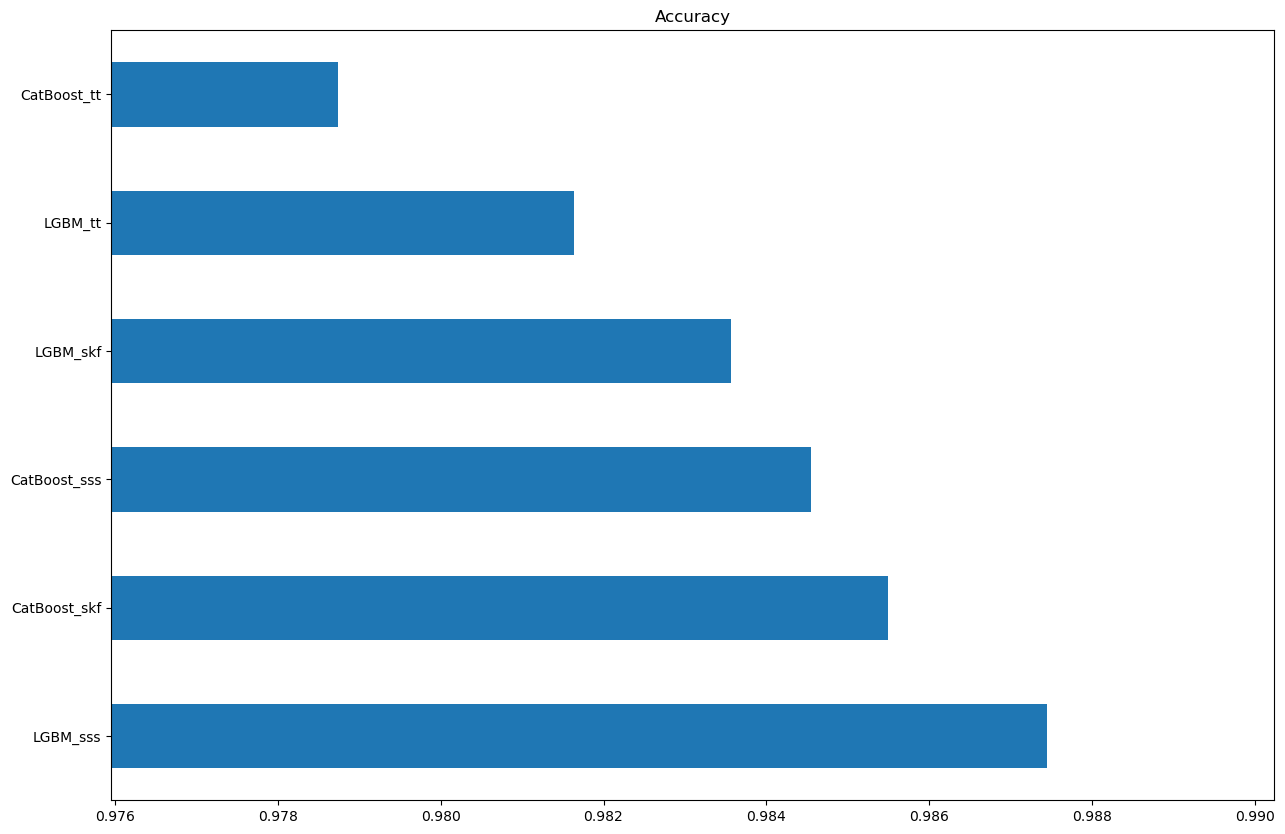

In [498]:
accuracy_graph(scores, ['CatBoost','LGBM'])

In [1]:
s1_df = s1_df.iloc[:-1]

NameError: name 's1_df' is not defined

In [466]:
acc_std = np.std(s1_df.Accuracy)

(0.7945047075237757, 1.0256113466348316)

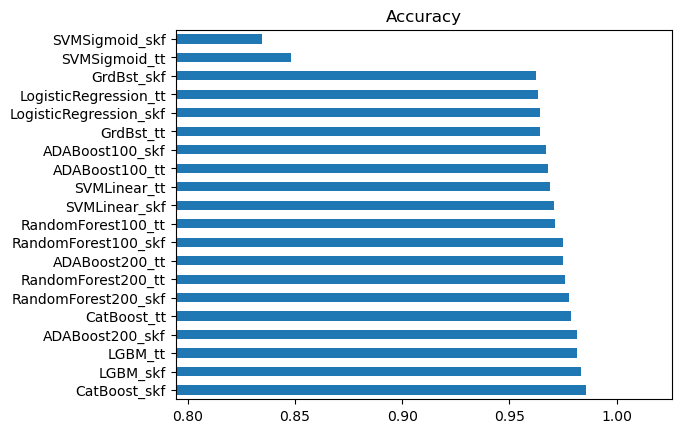

In [467]:
ax = s1_df[['Accuracy']].sort_values(by='Accuracy',ascending=False).plot(kind='barh', y='Accuracy', title='Accuracy', legend=False)

plt.xlim(min(s1_df.Accuracy) - acc_std, max(s1_df.Accuracy) + acc_std)

In [ ]:
#for pc in ['pca', 'svd', ]
score, ddf = sc_pca_class_test(X, y, MinMaxScaler(),None, 50, 0.2, LGBMClassifier(n_estimators=200), 'kf', 52)

In [387]:
pd.DataFrame.from_dict(scores, orient='index', columns=['accuracy']).sort_values(by='accuracy', ascending=False)

,accuracy
LGBM_skf,0.978723
SVMLinear_tt,0.976812
ADABoost200_tt,0.975845
LGBM_tt,0.975845
ADABoost200_skf,0.972921
ADABoost100_tt,0.971981
LogisticRegression_tt,0.971014
RandomForest200_tt,0.969082
ADABoost100_skf,0.968085
RandomForest200_skf,0.968085


In [391]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

In [393]:
model.fit(X_train, y_train)

Learning rate set to 0.018891
0:	learn: 0.6674408	total: 202ms	remaining: 3m 22s
1:	learn: 0.6418175	total: 238ms	remaining: 1m 58s
2:	learn: 0.6190177	total: 265ms	remaining: 1m 27s
3:	learn: 0.5981246	total: 290ms	remaining: 1m 12s
4:	learn: 0.5784861	total: 318ms	remaining: 1m 3s
5:	learn: 0.5602460	total: 343ms	remaining: 56.9s
6:	learn: 0.5434723	total: 364ms	remaining: 51.7s
7:	learn: 0.5268864	total: 382ms	remaining: 47.4s
8:	learn: 0.5125066	total: 402ms	remaining: 44.2s
9:	learn: 0.5060472	total: 424ms	remaining: 42s
10:	learn: 0.4939413	total: 446ms	remaining: 40.1s
11:	learn: 0.4854633	total: 464ms	remaining: 38.2s
12:	learn: 0.4725927	total: 482ms	remaining: 36.6s
13:	learn: 0.4606820	total: 501ms	remaining: 35.3s
14:	learn: 0.4500795	total: 523ms	remaining: 34.3s
15:	learn: 0.4375371	total: 543ms	remaining: 33.4s
16:	learn: 0.4283709	total: 564ms	remaining: 32.6s
17:	learn: 0.4191348	total: 585ms	remaining: 31.9s
18:	learn: 0.4111556	total: 606ms	remaining: 31.3s
19:	learn

162:	learn: 0.1568060	total: 3.84s	remaining: 19.7s
163:	learn: 0.1564570	total: 3.87s	remaining: 19.7s
164:	learn: 0.1557501	total: 3.89s	remaining: 19.7s
165:	learn: 0.1551128	total: 3.92s	remaining: 19.7s
166:	learn: 0.1546226	total: 3.94s	remaining: 19.6s
167:	learn: 0.1541589	total: 3.96s	remaining: 19.6s
168:	learn: 0.1536502	total: 3.98s	remaining: 19.6s
169:	learn: 0.1530493	total: 4.01s	remaining: 19.6s
170:	learn: 0.1528098	total: 4.03s	remaining: 19.5s
171:	learn: 0.1523601	total: 4.05s	remaining: 19.5s
172:	learn: 0.1519702	total: 4.08s	remaining: 19.5s
173:	learn: 0.1515071	total: 4.1s	remaining: 19.5s
174:	learn: 0.1509713	total: 4.12s	remaining: 19.4s
175:	learn: 0.1503854	total: 4.14s	remaining: 19.4s
176:	learn: 0.1500256	total: 4.17s	remaining: 19.4s
177:	learn: 0.1496172	total: 4.19s	remaining: 19.3s
178:	learn: 0.1490256	total: 4.21s	remaining: 19.3s
179:	learn: 0.1484535	total: 4.24s	remaining: 19.3s
180:	learn: 0.1480863	total: 4.26s	remaining: 19.3s
181:	learn: 0

328:	learn: 0.1027659	total: 7.8s	remaining: 15.9s
329:	learn: 0.1026058	total: 7.83s	remaining: 15.9s
330:	learn: 0.1024970	total: 7.85s	remaining: 15.9s
331:	learn: 0.1023996	total: 7.88s	remaining: 15.9s
332:	learn: 0.1021604	total: 7.9s	remaining: 15.8s
333:	learn: 0.1019881	total: 7.93s	remaining: 15.8s
334:	learn: 0.1017336	total: 7.95s	remaining: 15.8s
335:	learn: 0.1015101	total: 7.98s	remaining: 15.8s
336:	learn: 0.1012244	total: 8.01s	remaining: 15.8s
337:	learn: 0.1011046	total: 8.03s	remaining: 15.7s
338:	learn: 0.1008996	total: 8.06s	remaining: 15.7s
339:	learn: 0.1007496	total: 8.08s	remaining: 15.7s
340:	learn: 0.1006210	total: 8.1s	remaining: 15.7s
341:	learn: 0.1004524	total: 8.13s	remaining: 15.6s
342:	learn: 0.1001944	total: 8.15s	remaining: 15.6s
343:	learn: 0.0999958	total: 8.17s	remaining: 15.6s
344:	learn: 0.0999002	total: 8.2s	remaining: 15.6s
345:	learn: 0.0996889	total: 8.22s	remaining: 15.5s
346:	learn: 0.0995191	total: 8.24s	remaining: 15.5s
347:	learn: 0.09

488:	learn: 0.0744437	total: 11.5s	remaining: 12s
489:	learn: 0.0742331	total: 11.5s	remaining: 12s
490:	learn: 0.0741108	total: 11.5s	remaining: 11.9s
491:	learn: 0.0739823	total: 11.5s	remaining: 11.9s
492:	learn: 0.0737846	total: 11.6s	remaining: 11.9s
493:	learn: 0.0737738	total: 11.6s	remaining: 11.9s
494:	learn: 0.0736770	total: 11.6s	remaining: 11.8s
495:	learn: 0.0735525	total: 11.6s	remaining: 11.8s
496:	learn: 0.0734534	total: 11.7s	remaining: 11.8s
497:	learn: 0.0732863	total: 11.7s	remaining: 11.8s
498:	learn: 0.0731695	total: 11.7s	remaining: 11.8s
499:	learn: 0.0729750	total: 11.7s	remaining: 11.7s
500:	learn: 0.0728713	total: 11.8s	remaining: 11.7s
501:	learn: 0.0728389	total: 11.8s	remaining: 11.7s
502:	learn: 0.0726864	total: 11.8s	remaining: 11.6s
503:	learn: 0.0725758	total: 11.8s	remaining: 11.6s
504:	learn: 0.0723610	total: 11.8s	remaining: 11.6s
505:	learn: 0.0722327	total: 11.8s	remaining: 11.6s
506:	learn: 0.0721231	total: 11.9s	remaining: 11.5s
507:	learn: 0.07

655:	learn: 0.0568734	total: 15.2s	remaining: 7.95s
656:	learn: 0.0568037	total: 15.2s	remaining: 7.93s
657:	learn: 0.0567043	total: 15.2s	remaining: 7.91s
658:	learn: 0.0565850	total: 15.2s	remaining: 7.88s
659:	learn: 0.0565790	total: 15.3s	remaining: 7.86s
660:	learn: 0.0564483	total: 15.3s	remaining: 7.83s
661:	learn: 0.0563428	total: 15.3s	remaining: 7.81s
662:	learn: 0.0562396	total: 15.3s	remaining: 7.79s
663:	learn: 0.0561313	total: 15.3s	remaining: 7.76s
664:	learn: 0.0560465	total: 15.4s	remaining: 7.74s
665:	learn: 0.0559411	total: 15.4s	remaining: 7.72s
666:	learn: 0.0558250	total: 15.4s	remaining: 7.7s
667:	learn: 0.0558192	total: 15.4s	remaining: 7.67s
668:	learn: 0.0557161	total: 15.5s	remaining: 7.65s
669:	learn: 0.0556496	total: 15.5s	remaining: 7.63s
670:	learn: 0.0556368	total: 15.5s	remaining: 7.6s
671:	learn: 0.0555534	total: 15.5s	remaining: 7.58s
672:	learn: 0.0554498	total: 15.6s	remaining: 7.56s
673:	learn: 0.0553259	total: 15.6s	remaining: 7.53s
674:	learn: 0.

820:	learn: 0.0457946	total: 18.7s	remaining: 4.08s
821:	learn: 0.0457397	total: 18.7s	remaining: 4.05s
822:	learn: 0.0457354	total: 18.7s	remaining: 4.03s
823:	learn: 0.0457305	total: 18.8s	remaining: 4.01s
824:	learn: 0.0457026	total: 18.8s	remaining: 3.99s
825:	learn: 0.0456175	total: 18.8s	remaining: 3.97s
826:	learn: 0.0455352	total: 18.9s	remaining: 3.94s
827:	learn: 0.0454512	total: 18.9s	remaining: 3.92s
828:	learn: 0.0454439	total: 18.9s	remaining: 3.9s
829:	learn: 0.0453202	total: 18.9s	remaining: 3.88s
830:	learn: 0.0452880	total: 18.9s	remaining: 3.85s
831:	learn: 0.0451963	total: 19s	remaining: 3.83s
832:	learn: 0.0451023	total: 19s	remaining: 3.81s
833:	learn: 0.0450252	total: 19s	remaining: 3.78s
834:	learn: 0.0449682	total: 19s	remaining: 3.76s
835:	learn: 0.0449103	total: 19.1s	remaining: 3.74s
836:	learn: 0.0448449	total: 19.1s	remaining: 3.72s
837:	learn: 0.0447993	total: 19.1s	remaining: 3.69s
838:	learn: 0.0446949	total: 19.1s	remaining: 3.67s
839:	learn: 0.0446215

979:	learn: 0.0373133	total: 22.1s	remaining: 451ms
980:	learn: 0.0372577	total: 22.1s	remaining: 429ms
981:	learn: 0.0372542	total: 22.2s	remaining: 406ms
982:	learn: 0.0371723	total: 22.2s	remaining: 384ms
983:	learn: 0.0370950	total: 22.2s	remaining: 361ms
984:	learn: 0.0370381	total: 22.2s	remaining: 338ms
985:	learn: 0.0370165	total: 22.2s	remaining: 316ms
986:	learn: 0.0369708	total: 22.3s	remaining: 293ms
987:	learn: 0.0369623	total: 22.3s	remaining: 271ms
988:	learn: 0.0369349	total: 22.3s	remaining: 248ms
989:	learn: 0.0368595	total: 22.3s	remaining: 226ms
990:	learn: 0.0368081	total: 22.4s	remaining: 203ms
991:	learn: 0.0367728	total: 22.4s	remaining: 180ms
992:	learn: 0.0367194	total: 22.4s	remaining: 158ms
993:	learn: 0.0366426	total: 22.4s	remaining: 135ms
994:	learn: 0.0366153	total: 22.4s	remaining: 113ms
995:	learn: 0.0365447	total: 22.5s	remaining: 90.3ms
996:	learn: 0.0365092	total: 22.5s	remaining: 67.7ms
997:	learn: 0.0364302	total: 22.5s	remaining: 45.1ms
998:	lear

In [396]:
y_pred = model.predict(X_test)

In [398]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.9797101449275363


In [376]:
scores = {}
res_dfs = {}

for c_name, classifier in classifiers.items():
    for split_method in ['tt','skf']:
        a1, d1 = sc_pca_class_test(X, y, MinMaxScaler(), None, 50, 0.2, classifier, split_method, 12)
        key = c_name + '_' + split_method
        scores[key] = a1
        res_dfs[key] = d1

[LightGBM] [Info] Number of positive: 1164, number of negative: 2973
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.199342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21023
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2581
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281363 -> initscore=-0.937709
[LightGBM] [Info] Start training from score -0.937709
[LightGBM] [Info] Number of positive: 1200, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.259453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21041
[LightGBM] [Info] Number of data points in the train set: 4138, number of used features: 2583
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289995 -> initscore=-0.895408
[LightGBM] [Info] Start training from score -0.895408


In [195]:
def create_acc_df(classifies, sp_ls, pcs, n_components, rs_ls):
    
    n_results_acc = {}
    n_results_rep = {}

    for cl_name, cl_func in classifies.items():
        for p in pcs:
            for sp in sp_ls:
                for n in n_components:
                    for rs in rs_ls:
                        acc, rep = sc_pca_class_test(X, y, StandardScaler(), p, n, 0.2, cl_func, sp, rs) 
                        key_name = cl_name + '_' + sp + '_' + str(p) + '_' + str(n) + '_' + str(rs)
                        n_results_acc[key_name] = acc
                        n_results_rep[key_name] = rep
                        
    acc = pd.DataFrame.from_dict(n_results_acc, orient='index')
    acc.reset_index(inplace=True)
    acc.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)

    split_columns = acc['model'].str.split('_', expand=True)

    split_columns.columns = ['model_name', 'split_method', 'pca', 'n_components', 'random_state']

    acc2 = acc.join(split_columns)
    acc2.drop(columns=['model'], inplace=True) 
    

    
    return acc2.sort_values(by='accuracy', ascending=False), rep

In [225]:
parse_dc = {}

for k in n_results_rep.keys():
    n_results_rep[k].loc[['0','1'], ['precision', 'recall', 'f1-score']]
    
    
    ['accuracy', 'weighted avg'], ['precision', 'recall', 'f1-score']

,precision,recall,f1-score
0,0.981132,0.983784,0.982456
1,0.959044,0.952542,0.955782


In [ ]:
acc = pd.DataFrame.from_dict(n_results_rep, orient='index')
acc.reset_index(inplace=True)
acc.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)

split_columns = acc['model'].str.split('_', expand=True)

split_columns.columns = ['model_name', 'split_method', 'pca', 'n_components', 'random_state']

acc2 = acc.join(split_columns)
acc2.drop(columns=['model'], inplace=True) 



return acc2.sort_values(by='accuracy', ascending=False)

In [255]:
len(n_results_rep)

24

In [ ]:
pca_results_rep

In [253]:
rows = []

for model,df in n_results_rep.items():
    row = df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']].T.to_dict()
    row = row['weighted avg']
    row['model'] = model
    rows.append(row)

result_df = pd.DataFrame(rows)

result_df = result_df[['model', 'precision', 'recall', 'f1-score']]

In [261]:
rows = []

for model,df in pca_results_rep.items():
    row = df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']].T.to_dict()
    row = row['weighted avg']
    row['model'] = model
    rows.append(row)

p_result_df = pd.DataFrame(rows)

#p_result_df = p_result_df[['model', 'precision', 'recall', 'f1-score']]

In [262]:
len(p_result_df)

864

In [240]:
n_results_rep['RandomForest200_StandardScaler_tt_2'].loc[['weighted avg'], ['precision', 'recall', 'f1-score']]

,precision,recall,f1-score
weighted avg,0.975776,0.975845,0.975783


In [181]:
test_df = create_acc_df({key:value for (key,value) in classifiers.items() if key in ['RandomForest200']}, ['tt'], ['pca'], [25,50])

In [182]:
test_df

,accuracy,model_name,split_method,pca,n_components,random_state
1,0.972947,RandomForest200,tt,pca,25,9
3,0.971014,RandomForest200,tt,pca,50,25
4,0.969082,RandomForest200,tt,pca,50,9
0,0.968116,RandomForest200,tt,pca,25,25
2,0.968116,RandomForest200,tt,pca,25,210
5,0.967150,RandomForest200,tt,pca,50,210


In [170]:
top_classifiers = {key:value for (key,value) in classifiers.items() if key in ['RandomForest200', 'RandomForest100','LGBM']}
sp_ls_2 = ['tt', 'sss']
pcs = ['pca','svd', 'None']
n_components = [100, 75, 125]

In [468]:
pcs

['pca', 'svd', 'None']

In [ ]:
for v in [0,1]:
    df.loc[0,1]

In [154]:
n_results_acc = {}
n_results_rep = {}

for cl_name, cl_func in top_classifiers.items():
    for p in pcs:
        for sp in sp_ls_2:
            for n in n_components:
                for rs in [25, 9, 210]:
                    acc, rep = sc_pca_class_test(X, y, StandardScaler(), p, n, 0.2, cl_func, sp, rs) 
                    key_name = cl_name + '_' + sp + '_' + str(p) + '_' + str(n_components) + '_' + str(rs)
                    n_results_acc[key_name] = acc
                    n_results_rep[key_name] = rep

[LightGBM] [Info] Number of positive: 1205, number of negative: 2932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23809
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2610
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291274 -> initscore=-0.889205
[LightGBM] [Info] Start training from score -0.889205
[LightGBM] [Info] Number of positive: 1213, number of negative: 2924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23679
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2585
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293208 -> initscore=-0.879856
[LightGBM] [Info] Start training from score -0.879856
[LightGBM] [

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, stratify = y)

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Unique model and scaler combinations
combinations = mean_df.groupby(['model_name', 'scaler'])

# Plot lines for each combination
for (model_name, scaler), group in combinations:
    ax.plot(group['scaler'], group['precision'], marker='o', label=f'{model_name} - Precision')
    ax.plot(group['scaler'], group['recall'], marker='o', label=f'{model_name} - Recall')
    ax.plot(group['scaler'], group['f1-score'], marker='o', label=f'{model_name} - F1-Score')

# Add labels and title
ax.set_xlabel('Scaler')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Model and Scaler')
ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [282]:
def dfc(df):
    
    split_columns = df['model'].str.split('_', expand=True)

    split_columns.columns = ['model_name', 'scaler', 'split_method', 'n_components', 'random_state']

    df2 = df.join(split_columns)

    # Optionally, drop the original 'model' column
    df2.drop(columns=['model'], inplace=True)
    
    return df2

In [159]:
acc2.sort_values(by='accuracy', ascending=False)

,accuracy,model_name,scaler,split_method,random_state
8,0.981643,RandomForest200,StandardScaler,tt,410
19,0.980676,LGBM,StandardScaler,tt,52
22,0.979710,LGBM,StandardScaler,sss,52
3,0.976812,RandomForest100,StandardScaler,sss,2
21,0.976812,LGBM,StandardScaler,sss,2
6,0.975845,RandomForest200,StandardScaler,tt,2
9,0.975845,RandomForest200,StandardScaler,sss,2
1,0.975845,RandomForest100,StandardScaler,tt,52
0,0.974879,RandomForest100,StandardScaler,tt,2
11,0.974879,RandomForest200,StandardScaler,sss,410


In [317]:

'lda_svd'[:3]

'lda'

In [245]:
from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [246]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [374]:
classifiers

{'LogisticRegression': LogisticRegression(max_iter=500),
 'RandomForest100': RandomForestClassifier(),
 'RandomForest200': RandomForestClassifier(n_estimators=200),
 'SVMLinear': SVC(kernel='linear'),
 'SVMSigmoid': SVC(kernel='sigmoid'),
 'KNN5n': KNeighborsClassifier(),
 'KNN15n': KNeighborsClassifier(n_neighbors=15),
 'KNN25n': KNeighborsClassifier(n_neighbors=25),
 'LGBM': LGBMClassifier(),
 'GrdBst': GradientBoostingClassifier(),
 'ADABoost100': AdaBoostClassifier(n_estimators=100),
 'ADABoost200': AdaBoostClassifier(n_estimators=200)}

In [371]:
#for pc in ['pca', 'svd', ]
score, ddf = sc_pca_class_test(X, y, MinMaxScaler(),None, 50, 0.2, LGBMClassifier(n_estimators=200), 'kf', 52)

In [372]:
score

0.9806576402321083

In [242]:
def sc_pca_class_test(X, y, scaler, reduce, components, ts, classifier, split_method, rs):

    if scaler:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = None
        
    r_params = {'n_components': components, 'random_state': rs}
    
    r_dc = {'pca': PCA(**r_params),
             'svd' : TruncatedSVD(**r_params),
             'tsne': TSNE(method='exact', n_components= components, random_state= rs),
             'lda_svd' : LDA(n_components= 2, solver= 'svd')}
    
    if reduce in r_dc.keys():
        if reduce[:3].lower() == 'lda':
            X_reduced = r_dc[reduce].fit_transform(X_scaled, y)
        else:
            X_reduced = r_dc[reduce].fit_transform(X_scaled)
    else: 
        X_reduced = X_scaled.copy()   
        
    n_splits=int((1/ts))
    
    split_dc = {
           'skf' : StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rs),
            'sss' : StratifiedShuffleSplit(n_splits=n_splits, test_size=ts, random_state=rs),    
            'kf': KFold(n_splits=n_splits, shuffle=True, random_state=rs)
    }
    

    if split_method == 'tt':

        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=ts, random_state=rs)
        
    elif split_method in split_dc.keys():
        
        for train_index, test_index in split_dc[split_method].split(X_reduced, y):
            X_train, X_test = X_reduced[train_index], X_reduced[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
    else:
        print(split_method + ' not allowed')
        return 'FAILURE'
    
    classifier.fit(X_train, y_train)    
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report_dc = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dc).transpose()
    
    return accuracy, report_df

In [324]:
bac, brep = sc_pca_class_test(X, y, StandardScaler(), 'lda_svd', 5, 0.2, RandomForestClassifier(), 'tt', 42)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).